<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

## Choice of datasets

[Wet Bulb Temperature Hourly](https://data.gov.sg/dataset/wet-bulb-temperature-hourly) <br>
- Singapore hourly wet bulb temperature from 01/01/1982 to 31/05/2023 <br>

[Surface Air Temperature Monthly](https://data.gov.sg/dataset/surface-air-temperature-monthly-mean) <br>
- Singapore monthly mean surface air temperature from 01/1982 to 05/2023 <br>

[Air Temperature And Sunshine, Relative Humidity And Rainfall](https://tablebuilder.singstat.gov.sg/table/TS/M890081) <br>
- Singapore monthly data for 3 different variables from 01/1975 to 05/2023. These are:
<!-- -  1) Mean of daily max air temperature
   2) Mean of daily min air temperature
   3) Maximum air temperature
   4) Minimum air temperature -->
   1) Total rainfall
   2) Daily mean sunshine
   3) 24 hours mean relative humidity

[Carbon Dioxide](https://gml.noaa.gov/ccgg/trends/data.html) <br>
- Global monthly mean carbon dioxide values in ppm (parts-per-million) from 03/1958 to 06/2023 <br>

[Methane](https://gml.noaa.gov/ccgg/trends_ch4/) <br>
- Global monthly mean methane values in ppb (parts-per-billion) from 07/1983 to 03/2023 <br>

[N2O](https://gml.noaa.gov/ccgg/trends_n2o/) <br>
- Global monthly mean nitrous oxide values in ppb (parts-per-billion) from 01/2001 to 03/2023 <br>

[SF6](https://gml.noaa.gov/ccgg/trends_sf6/)<br>
- Global monthly mean sulfur hexafluoride values in ppt (parts-per-trillion) from 07/1997 to 03/2023 <br>



### Regarding the original two datasets already in [`data`](./data/)

[`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv) - I have chosen to use [Air Temperature And Sunshine, Relative Humidity And Rainfall](https://tablebuilder.singstat.gov.sg/table/TS/M890081) instead as this dataset also contains monthly total rainfall and for a period of 7 more years (84 months)

[`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv) - I did not make use of this dataset but I have read it into a dataframe to answer questions 3 and 4 of the compulsory questions under the EDA section

## Problem Statement
In a yet to be determined year in the future, the government of Singapore has embarked on a fact-finding mission to guide public policy decision making, so as to future-proof Singapore from the negative effects of climate change. The goal is ambitious, and one of the many questions that the government hopes to find the answer to, is how do commonly measured variables of our weather (sunshine, rainfall, relative humidity and air temperature), including the levels of the four main greenhouse gases (carbon dioxide, methane, nitrous oxide and sulfur hexafluoride), affect the wet-bulb temperature (WBT) of Singapore?

As one of many data scientists in this imaginary fact-finding body, I have been tasked with determining if these four local climate variables and the four global greenhouse gases have any predictive value on the WBT. I will also be analyzing the presence of, or lack of, a relationship between these variables and the WBT. Any correlation with the WBT, will be useful to know before making a prediction.

The rationale for my problem statement is thus; the effect of climate change on human habitation is arguably one of the most important issues facing humanity in the 21st century. With each passing year, the evidence in favour of climate change continues to grow, and no nation or person can expect to be spared. No longer do governments debate whether their populations will be affected, but by how much the effect will be. In the context of Singapore, a warming planet will exacerbate heat stress in the absence of some form of human engineered climate control. Will our future children be able to enjoy the outdoors the same way as we do today? Or will venturing outdoors without some form of augmention only be possible for limited periods of time? What then will life be like in a future Singapore that is too hot outside for human survivability?


## Outside Research

### 1. How does the human body cool itself down?

The human body normally cools itself by perspiration (also known as sweating). [Sweating helps to cool our bodies because heat is removed from our bodies by the evaporation of our sweat.](https://openstax.org/books/biology-2e/pages/33-3-homeostasis) The rate of evaporation of our sweat is directly affected by the humidity in the air. As the air around us gets more humid, our bodies are less able to sweat effectively, which reduces our ability to cool ourselves down. This can cause the human body to become overheated and is why dry heat feels more tolerable than extreme humidity. 

[External link to diagram illustrating how we regulate our body temperature.](https://cdn.kastatic.org/ka-perseus-images/69ad70de87b8e05dcbd1708d4f48dc176e1276e9.png)

### 2. How do weather forecasters measure how hot we feel?
In weather forecasting, the heat index is typically provided in addition to forecasts of temperature and relative humidity. [The heat index is also known as ‘apparent temperature’ and was developed in 1979 by Robert G. Steadman.](https://link.springer.com/referenceworkentry/10.1007/1-4020-3266-8_94)

[External link to diagram of heat index.](https://www.weather.gov/images/safety/heatindexchart-650.jpg)

The heat index is a measure of what the air temperature in the shade feels like to our bodies when relative humidity is factored in. The limitation of the heat index is that it does not work well with the kind of extreme conditions that humanity is likely to encounter in the future due to climate change. [In fact, the heat index is actually undefined at high heat and humidity due to assumptions that were built-in when the heat index was first defined.](https://newscenter.lbl.gov/2022/08/24/no-more-underestimating-heat-waves/)

Enter the wet-bulb temperature (WBT).



### 3. What is the WBT?
[Before the advent of modern sensors, the WBT was measured using a thermometer with the bulb wrapped in wet muslin. ](https://www.weather.gov/source/zhu/ZHU_Training_Page/definitions/dry_wet_bulb_definition/dry_wet_bulb.html) The WBT is only equal to the air temperature (also known as the dry-bulb temperature) at 100% relative humidity. At relative humidities less than 100%, the WBT is always lower than the dry-bulb temperature because of evaporative cooling.

[The WBT can be calculated from the % relative humidity and the air temperature in °C, instead of being directly measured.](https://physicscalc.com/physics/wet-bulb-calculator/) The formula is given as:
WBT = T * arctan[0.151977 * (rh% + 8.313659)^(1/2)] + arctan(T + rh%) - arctan(rh% - 1.676331) + 0.00391838 *(rh%)^(3/2) * arctan(0.023101 * rh%) - 4.686035, where T is air temperature in °C and rh is relative humidity in %.



### 4. Why does the WBT matter for humans?
Essentially, the WBT is the lowest temperature to which an object can cool down when moisture evaporates from it. A lower WBT makes it easier for the human body to cool down. Therefore, the WBT can be used to measure how well our bodies cool down by sweating when it’s hot and humid. [The WBT will also alert us if temperature conditions may be harmful, or even deadly, to our health.](https://www.theguardian.com/science/2022/jul/31/why-you-need-to-worry-about-the-wet-bulb-temperature)

[A normal internal human body temperature of 36.8° ± 0.5°C requires skin temperatures of around 35°C to maintain a gradient directing heat outwards from the core.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7209987/) Once the air (dry-bulb) temperature rises above 35°C, the human body can only cool down by sweating. But when the WBT exceeds 35°C, our ability to dissipate heat by sweating breaks down entirely. 


Tapio Schneider, a California Institute of Technology climate scientist and professor, explains it this way, [“If the WBT reading is higher than our body temperature, then we cannot cool ourselves to a temperature tolerable for humans by evaporating sweat, and that basically means you can’t survive”.](https://www.washingtonpost.com/weather/2021/07/24/wet-bulb-temperature-extreme-heat/) Therefore because of our biology, the threshold WBT beyond which human beings cannot survive is 35°C, because our bodies start to gain heat from the environment instead of the other way round.

According to Colin Raymond, of NASA’s Jet Propulsion Laboratory in Southern California, [“The highest WBT that humans can survive for at least six hours is about 35°C. At that temperature no amount of sweating or other adaptive behavior is enough to lower our bodies to a safe operating temperature."](https://climate.nasa.gov/explore/ask-nasa-climate/3151/too-hot-to-handle-how-climate-change-may-make-some-places-too-hot-to-live/)

### 5. But a WBT lower than 35°C can still be deadly.

This threshold WBT of 35°C hypothesizes that there exists an upper limit for survivability under sustained exposure, even with idealized conditions of perfect health, total inactivity, full shade, absence of clothing, and unlimited drinking water. But because the ideal physiological and behavioral assumptions are almost never met, severe mortality and morbidity impacts typically occur at much lower values. [For example, regions affected by the deadly 2003 European and 2010 Russian heat waves experienced WBT values no greater than 28°C.](https://www.washingtonpost.com/business/energy/2023/07/04/explainer-how-extreme-heat-and-high-wet-bulb-temperatures-kill-people/83bca63e-1ada-11ee-be41-a036f4b098ec_story.html)

Those most susceptible to a high WBT include the elderly, people who work outside, and those with underlying health issues. [In fact, research suggests that a WBT threshold cannot be applied to human adaptability across all climatic conditions and in regions with high humidity, the WBT threshold is well below 35°C.](https://journals.physiology.org/doi/full/10.1152/japplphysiol.00738.2021)


### 6. Is climate change affecting the WBT?
Analyzing data from more than 7500 weather stations from 1979 to 2017, [the authors from this study found that extreme heat/humidity combinations doubled over the study period.](https://phys.org/news/2020-05-potentially-fatal-combinations-humidity-emerging.html) Repeated incidents appeared in much of India, Bangladesh and Pakistan; northwestern Australia; and along the coasts of the Red Sea and Mexico's Gulf of California. The highest, potentially fatal, readings were spotted 14 times in the cities of Dhahran/Damman, Saudi Arabia; Doha, Qatar; and Ras Al Khaimah, United Arab Emirates. Parts of southeast Asia, southern China, subtropical Africa and the Caribbean were also hit.

While climate models project that the first occurences of a WBT of 35°C will only occur by the mid-21st century, the reality is that some coastal subtropical locations have already seen such extreme values. [Furthermore, recent exceedances of 35°C in global maximum sea surface temperature provide further support for the validity of these dangerous high WBT levels.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7209987/)


### 7. The role of greenhouses gases on the WBT

Climate change can either be natural or anthropogenic (caused by humans). The latter kind features more prominently in the news and for good reason. A change brought about by human activity can also be brought to a halt by people, as opposed to a change that is by causes beyond our control. Therefore in a study on the relationship of certain variables on the WBT, these certain variables should also include the most important greenhouse gas emissions. These greenhouse gas emissions are the result of human activity (anthropogenic) and if these emissions have a relationship with climate change, and if climate change is affecting the WBT, then greenhouse gases should have a relationship with the WBT. [I have chosen the four main greenhouse gases as measued by the NOAA.](https://gml.noaa.gov/ccgg/trends/data.html)

These greenhouse gases, which are carbon dioxide, methane, nitrous oxide and sulfur hexafluoride, are molecules which strongly absorb energy in the infra-red spectrum. [This has the effect of 'trapping' more heat in the atmosphere and warming the planet.](https://www.nrdc.org/stories/greenhouse-effect-101#gases)

[Much research has been done on the effects of the rising concentration of greenhouse gases on climate change, particularly their effect on temperature.](https://www.epa.gov/climatechange-science/basics-climate-change) Although the exact casuality may still be open to debate, we expect to see the existence of a correlation between greenhouse gas concentrations and temperature. Since WBT is mathematically a function of surface air temperature and relative humidity, we should also expect to see some correlation between WBT and the greenhouse gases, in the absence of confounding variables.

### 8. The role of sunshine and total rainfall on the WBT
As mentioned earlier in part 3, even without instrumentation, the WBT can be derived from air temperature and relative humidity since WBT is mathematically a function of the other 2 variables. Therefore, I have included air temperature and relative humidity as variables to be considered. What then about sunshine and total rainfall?

A casual reader might make the inference that rainfall and relative humidity must be one and the same thing. After all, when it rains, the air is full of moisture, and when the air is full of moisture, then it must be raining! The reality is that the interplay between them is more complicated. Firstly, clouds (which is where rain comes from) don't normally form at sea level in equatorial Singapore, and relative humidity is not measured up in the clouds. [Secondly, relative humidity is a measure of the actual amount of moisture in the air compared to the total amount of moisture that the air can hold,](https://www.scientificamerican.com/article/what-causes-humidity/) so yes relative humidity at sea level does increase when it rains. But this is ignoring the effect of the ocean, or seas, to which Singapore as an island is directly adjacent to, and also the effect of wind, on both relative humidity and total rainfall. Those are variables not taken into account for this study due to the lack of availability of data. What should be expected is that total rainfall has some relationship with relative humidity and therefore on WBT.

A similar complicated interplay exists for sunshine and relative humidity. Although a hot sunny day would mean that puddles of water left after a heavy rain eventually evaporate, that moisture is now in a gaseous state, which should increase the relative humidity, [but hot air can hold more moisture than colder air,](https://sealevel.jpl.nasa.gov/ocean-observation/understanding-climate/air-and-water/) which should then decrease the relative humidity. Again, this is ignoring the presence of other confounding variables such as wind. The fact is that climate is extremely difficult to model, with many variables affecting each other and sometimes in ways not yet completely understood. Therefore, although I have outlined a logical basis upon which I have chosen my variables, the results of any relationship are the point of the study.

### 9. What does all this portend for the climate of Singapore in the future?
Can one imagine a Singapore where shorts and sandals have become accepted office attire? Or when daily heat advisories are the norm? How about a Singapore where daily temperatures above 40°C have become so commonplace that the joy of venturing outdoors in the sun has become but a distant memory? This is the dystopian future version of Singapore if global warming continues unabated. According to Minister for Sustainability and the Environment, Grace Fu, [“Singapore is set to experience days with peak temperatures of 40 degrees Celsius as early as 2045”.](https://www.channelnewsasia.com/singapore/singapore-weather-40-degrees-celsius-heatwave-global-warming-aircon-3597176)

But the changes in our day to day living aren’t the only things that we will have to be prepared for. What about all the jobs that take place outdoors? What will be the consequences for our military operating in such a hazardous environment? What about the desultory effects on those who cannot afford near constant air-conditioning? [The authors of this study suggest](https://www.gfdl.noaa.gov/research_highlight/heat-stress-reduces-labor-capacity-under-climate-warming/) that should climate change continue unmitigated, the world will see labor capacity losses doubling by 2050. It does not seem impossible, then for Singapore to eventually pass laws prohibiting construction work outside of the hottest daylight hours, [as is already the case in Qatar and Saudi Arabia.](https://www.ilo.org/global/about-the-ilo/newsroom/news/WCMS_794475/lang--en/index.htm)

[A study by NUS scientists](https://www.straitstimes.com/singapore/environment/nus-scientists-to-study-construction-workers-risk-of-heat-stress) on heat stress on foreign workers in their workplaces and dormitories actually raises the additional question of economic trade-offs. Who pays for their air-conditioning bill? The messaging from governments is clear, tackling climate change will require trade-offs, either today, or in the future. In Singapore's context, with an ever aging population, the nation will face the additional burden of keeping them cool, since the elderly are more susceptible to heat stress. As mentioned earlier, certain demographics in Singapore that are unable to afford 24-hour air conditioning will experience the brunt of this new normal, which only further raises the issue of equality in climate change. 

Do nations and their populations start making trade-offs today for the future generations who will inhabit our planet? Or have we resigned ourselves to kicking the climate change bucket down the road, deciding that those costs should be borne by the men, women and children of the near future. Dear reader, do bear in mind that practising the 3Rs (red today

This is why, our problem statement of determining a relationship between weather variables, including greenhouse gas emissions, and the WBT is so important. If there is no relationship, then the greater the impetus that we find one, in the hope that changes to our global environment have been brought about by human intervention instead of some yet to be determined cause. Better then, that there is a relationship, so action can be taken to ameliorate the effects of an ‘unbearably’ hot world. Ultimately though, if a warming world is a future that humanity inevitably faces, then knowledge of this future we face can at least guide our actions towards making the world, and Singapore, livable even by the end of the 21st century.


## Coding Challenges

### 1. Manually calculate mean:

Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
*Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [89]:
# import numpy and math to verify our custom functions return the correct value
# rest of libraries are imported later on in the notebook
# not best practice, but I rather verify the correctness of my functions than have a logical/semantic error
import numpy as np
import math

In [90]:
# Defining a function that takes in a list of numbers and returns the mean
def custom_mean(list):
    total = 0
    for element in list:
        total += element
    return (total/len(list))

# Defining a function that takes in a list of numbers and returns the mean HANDLING FOR NAN
def custom_mean_nan(list):
    total = 0
    no_nan_length = 0
    for element in list:
        if not math.isnan(element): 
            total += element
            no_nan_length += 1
    return total/no_nan_length

In [91]:
#testing custom_mean
print(custom_mean(range(1,5)))
#testing custom_mean_nan
print(custom_mean_nan([1,np.nan,2,3,4]))
#verify with np.mean, round values so we don't run into issues with floats not displaying correctly
round(custom_mean(range(1,5)), 2) == round(np.mean(range(1,5)), 2)

2.5
2.5


True

### 2. Manually calculate standard deviation:

The formula for standard deviation is below:

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
*Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [92]:
# Defining a function that takes in a list of numbers and returns the standard deviation
def custom_std(list):
    total = 0
    squares = [((element - custom_mean(list)) ** 2) for element in list]
    for square in squares:
        total += square
    return (total/len(list)) ** 0.5

# Defining a function that takes in a list of numbers and returns the standard deviation HANDLING FOR NAN
def custom_std_nan(list):
    total = 0
    squares = [((element - custom_mean_nan(list)) ** 2) for element in list if not math.isnan(element)]
    no_nan_list = [element for element in list if not math.isnan(element)]
    for square in squares:
        total += square
    return (total/len(no_nan_list)) ** 0.5

In [93]:
#testing custom_std
print(custom_std(range(1,5)))
#testing custom_std_nan
print(custom_std_nan([1,np.nan,2,3,4]))
#verify with np.std, round values so we don't run into issues with floats not displaying correctly
round(custom_std(range(1,5)), 2) == round(np.std(range(1,5)), 2)

1.118033988749895
1.118033988749895


True

## Data Import and Cleaning

In [94]:
# Imports our required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats  


### Weather dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check the shape
4. Check for missing values
5. Check for duplicates


In [95]:
# Assigning our first csv to climate_variables_df
climate_variables_df = pd.read_csv("../data/M890081.csv", 
                                   header=10,
                                   skipfooter=17,
                                   engine='python')

# Check the first 5 rows
climate_variables_df.head()

,Data Series,Total Rainfall,Bright Sunshine Daily Mean,24 Hours Mean Relative Humidity
0,2023 May,112.8,6.6,73.7
1,2023 Apr,222.8,5.8,77.4
2,2023 Mar,243.4,6.0,79.2
3,2023 Feb,324.4,5.1,79.4
4,2023 Jan,302.6,4.4,81.9


In [96]:
# Check the last 5 rows. Looks like we read in our csv correctly!
climate_variables_df.tail()

,Data Series,Total Rainfall,Bright Sunshine Daily Mean,24 Hours Mean Relative Humidity
576,1975 May,104.6,5.6,86.1
577,1975 Apr,79.7,5.7,87.9
578,1975 Mar,197.9,5.8,87.8
579,1975 Feb,98.6,4.8,86.2
580,1975 Jan,121.0,6.2,85.8


In [97]:
# Printing the shape of climate_variables_df
print(climate_variables_df.shape, '\n')
# Checking for missing values, no missing values!
climate_variables_df.isna().sum()
# Checking for duplicates. No duplicates!
climate_variables_df.duplicated().sum()

(581, 4) 



0

In [98]:
# Print out column names
print(climate_variables_df.columns, '\n')
# Creating a dictionary mapping old to new column names, with no whitespaces and names all in lowercase
columns_climate = {'Data Series': 'month', 
                   'Total Rainfall ': 'total_rainfall',
                   'Bright Sunshine Daily Mean ': 'daily_mean_sunshine',
                   '24 Hours Mean Relative Humidity ': 'mean_relative_humidity'
                  }
# Renaming the columns for climate_variables_df
climate_variables_df.rename(columns=columns_climate, inplace=True)
# Print out column names to ensure changes have been made. Looks good!
print(climate_variables_df.columns)

Index(['Data Series', 'Total Rainfall ', 'Bright Sunshine Daily Mean ',
       '24 Hours Mean Relative Humidity '],
      dtype='object') 

Index(['month', 'total_rainfall', 'daily_mean_sunshine',
       'mean_relative_humidity'],
      dtype='object')


In [99]:
# Checking data types. 'month' datatype is not correct
climate_variables_df.dtypes

month                      object
total_rainfall            float64
daily_mean_sunshine       float64
mean_relative_humidity    float64
dtype: object

#### Data Cleaning

The following will outline the steps taken:

1. Rename column values
2. Check datatypes
3. Recast date to datetime64 and then to period(monthly)
4. Print out first 5 rows again

In [100]:
# Typecasting 'month' to datetime64
climate_variables_df['month'] = pd.to_datetime(climate_variables_df['month'],
                                               infer_datetime_format=True,)
                                               
# Print first 5 rows of 'month' to verify changes
print(climate_variables_df['month'].head(), '\n')
# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
climate_variables_df['month'] = climate_variables_df['month'].dt.to_period('M')
# Print first 5 rows to verify 'month' makes sense. Looks good!
print(climate_variables_df['month'].head())

0   2023-05-01
1   2023-04-01
2   2023-03-01
3   2023-02-01
4   2023-01-01
Name: month, dtype: datetime64[ns] 

0    2023-05
1    2023-04
2    2023-03
3    2023-02
4    2023-01
Name: month, dtype: period[M]


C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\2191030609.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  climate_variables_df['month'] = pd.to_datetime(climate_variables_df['month'],
C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\2191030609.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  climate_variables_df['month'] = pd.to_datetime(climate_variables_df['month'],


In [101]:
# Finally one last look at the first five rowa
climate_variables_df.head()

,month,total_rainfall,daily_mean_sunshine,mean_relative_humidity
0,2023-05,112.8,6.6,73.7
1,2023-04,222.8,5.8,77.4
2,2023-03,243.4,6.0,79.2
3,2023-02,324.4,5.1,79.4
4,2023-01,302.6,4.4,81.9


### Surface air temperature dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check the shape
4. Check for missing values
5. Check for duplicates


In [102]:
# Assigning our second csv to surface_airtemp_df
surface_airtemp_df = pd.read_csv("../data/surface-air-temperature-monthly-mean.csv")
# Check the first 5 rows
surface_airtemp_df.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [103]:
# Check the last 5 rows. Looks like we read in our csv correctly!
surface_airtemp_df.tail()

,month,mean_temp
492,2023-01,26.5
493,2023-02,26.9
494,2023-03,27.1
495,2023-04,28.5
496,2023-05,29.5


In [104]:
# Printing the shape of surface_airtemp_df
print(surface_airtemp_df.shape, '\n')
# Checking for missing values. Good, no missing values!
surface_airtemp_df.isna().sum()
# Checking for duplicates. No duplicates!
surface_airtemp_df.duplicated().sum()

(497, 2) 



0

#### Data Cleaning

The following will outline the steps taken:

1. Rename column values
2. Check datatypes
3. Recast date to datetime64 and then to period(monthly)
4. Print out first 5 rows again

In [105]:
# Print out column names. 
print(surface_airtemp_df.columns, '\n')
# Rename 'mean_temp' as 'mean_surface_airtemp'
surface_airtemp_df.columns = ['month', 'mean_surface_airtemp']
# Print out column names. Looks good!
print(surface_airtemp_df.columns)

Index(['month', 'mean_temp'], dtype='object') 

Index(['month', 'mean_surface_airtemp'], dtype='object')


In [106]:
# Checking data types. 'month' datatype is not correct
surface_airtemp_df.dtypes

month                    object
mean_surface_airtemp    float64
dtype: object

In [107]:
# Typecasting 'month' to datetime64
surface_airtemp_df['month'] = pd.to_datetime(surface_airtemp_df['month'],
                                               infer_datetime_format=True,)
                                               
# Print first 5 rows of 'month' to verify changes
print(surface_airtemp_df['month'].head(), '\n')
# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
surface_airtemp_df['month'] = surface_airtemp_df['month'].dt.to_period('M')
# Print first 5 rows of month to verify 'month' makes sense. Looks good!
print(surface_airtemp_df['month'].head())

0   1982-01-01
1   1982-02-01
2   1982-03-01
3   1982-04-01
4   1982-05-01
Name: month, dtype: datetime64[ns] 

0    1982-01
1    1982-02
2    1982-03
3    1982-04
4    1982-05
Name: month, dtype: period[M]


C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\2224381883.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  surface_airtemp_df['month'] = pd.to_datetime(surface_airtemp_df['month'],


In [108]:
# Finally, one last look at the first 5 rows
surface_airtemp_df.head()

,month,mean_surface_airtemp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


### Wet-bulb temperature dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check datatypes
4. Check the shape
5. Check for missing values
6. Check for duplicates


In [109]:
# Assigning our third csv to wetbulbtemp_df
wetbulbtemp_df = pd.read_csv("../data/wet-bulb-temperature-hourly.csv")
# Check the first 5 rows
wetbulbtemp_df.head()

,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2


In [110]:
# Check the last 5 rows. Looks like we read in our csv correctly!
wetbulbtemp_df.tail()

,wbt_date,wbt_time,wet_bulb_temperature
363019,2023-05-31,20,26.1
363020,2023-05-31,21,26.1
363021,2023-05-31,22,26.4
363022,2023-05-31,23,26.4
363023,2023-05-31,24,26.5


In [111]:
# Checking data types. 'wbt_date' datatype is not correct
wetbulbtemp_df.dtypes

wbt_date                 object
wbt_time                  int64
wet_bulb_temperature    float64
dtype: object

In [112]:
# Printing the shape of wetbulbtemp_df. Hmm we have A LOT of rows and that is because we have data for
# each hour for each day. This is a bit too granular compared to our other dataframes!
print(wetbulbtemp_df.shape, '\n')
# Checking for missing values. Good, no missing values!
wetbulbtemp_df.isna().sum()
# Checking for duplicates. No duplicates!
wetbulbtemp_df.duplicated().sum()

(363024, 3) 



0

#### Data Cleaning

There are some challenges with this csv file as we get extremely granular data in the form of wet bulb temperature per hour. For a month consisting of 30 days, we have 720 observations (row). Therefore I would like to find the mean wet bulb temperature per month so we can merge with our other dataframes.

The following will outline the steps taken:

1. Recast date to datetime64
2. Create datetimeindex object, groupby year and month and aggregate by month. Assign this output as a new dataframe and print the first 5 rows
3. Reset this dataframe index and print out the first 5 rows
4. Rename columns due to duplicate naming and print out first 5 rows
5. Create new date column using month and year and print out the first 5 rows
6. Check data types
7. Recast date to datetime64 and then to period(monthly). Print out the first 5 rows
8. Drop year and month columns. Rename columns. Print out the first 5 rows.
9. Round wet-bulb temperature values to 1 decimal place
10. Print out the first 5 rows one last time

In [113]:
# Typecasting 'wbt_date' to datetime64
wetbulbtemp_df['wbt_date'] = pd.to_datetime(wetbulbtemp_df['wbt_date'],
                                               infer_datetime_format=True,)
                                              
# Print 'wbt_date' to verify changes
print(wetbulbtemp_df['wbt_date'].head())

0   1982-01-01
1   1982-01-01
2   1982-01-01
3   1982-01-01
4   1982-01-01
Name: wbt_date, dtype: datetime64[ns]


C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\3227649453.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  wetbulbtemp_df['wbt_date'] = pd.to_datetime(wetbulbtemp_df['wbt_date'],


In [114]:
# Create a datetimeindex object
dt_index_obj = pd.DatetimeIndex(wetbulbtemp_df['wbt_date'])
# Groupby year and month and aggregate by mean. Assign this series to new_wetbulbtemp variable
new_wetbulbtemp = wetbulbtemp_df.groupby([dt_index_obj.year, dt_index_obj.month])['wet_bulb_temperature'].mean()
# Assign new_wetbulbtemp variable as dataframe to new_wetbulbtemp_df
new_wetbulbtemp_df = new_wetbulbtemp.to_frame()
# Print first 5 rows of new_wetbulbtemp_df. Looks like we need to remove the MultiIndex
new_wetbulbtemp_df.head()

wet_bulb_temperature
wbt_date wbt_date                      
1982     1                    23.456048
         2                    24.297619
         3                    24.811559
         4                    25.103750
         5                    25.689651

In [115]:
# Reset index
new_wetbulbtemp_df.reset_index(allow_duplicates=True, inplace=True)
# Printing the first 5 rows again. We have duplicate column names!
new_wetbulbtemp_df.head()

,wbt_date,wbt_date,wet_bulb_temperature
0,1982,1,23.456048
1,1982,2,24.297619
2,1982,3,24.811559
3,1982,4,25.103750
4,1982,5,25.689651


In [116]:
# Renaming columns
new_wetbulbtemp_df.columns = ['year', 'month', 'wet_bulb_temperature']
# Check that our column names are correct
new_wetbulbtemp_df.head()

,year,month,wet_bulb_temperature
0,1982,1,23.456048
1,1982,2,24.297619
2,1982,3,24.811559
3,1982,4,25.103750
4,1982,5,25.689651


In [117]:
# Create a new column called 'date' that is a string of both 'year' and 'month'
new_wetbulbtemp_df['date'] = new_wetbulbtemp_df['year'].astype(str) + "-" + new_wetbulbtemp_df['month'].astype(str)
# Check that our 'date' column is populated correctly
new_wetbulbtemp_df.head()

,year,month,wet_bulb_temperature,date
0,1982,1,23.456048,1982-1
1,1982,2,24.297619,1982-2
2,1982,3,24.811559,1982-3
3,1982,4,25.103750,1982-4
4,1982,5,25.689651,1982-5


In [118]:
# Check our dtypes again
print(new_wetbulbtemp_df.dtypes)

year                      int32
month                     int32
wet_bulb_temperature    float64
date                     object
dtype: object


In [119]:
# Typecasting 'date' to datetime64
new_wetbulbtemp_df['date'] = pd.to_datetime(new_wetbulbtemp_df['date'],
                                               infer_datetime_format=True,)
                                              
# Print 'date' to verify changes
print(new_wetbulbtemp_df['date'].head(), '\n')

# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
new_wetbulbtemp_df['date'] = new_wetbulbtemp_df['date'].dt.to_period('M')

# Print first 5 rows to verify 'date' makes sense. Looks good!
new_wetbulbtemp_df.head()

C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\3082930827.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_wetbulbtemp_df['date'] = pd.to_datetime(new_wetbulbtemp_df['date'],


0   1982-01-01
1   1982-02-01
2   1982-03-01
3   1982-04-01
4   1982-05-01
Name: date, dtype: datetime64[ns] 



,year,month,wet_bulb_temperature,date
0,1982,1,23.456048,1982-01
1,1982,2,24.297619,1982-02
2,1982,3,24.811559,1982-03
3,1982,4,25.103750,1982-04
4,1982,5,25.689651,1982-05


In [120]:
# Drop 'year' and 'month' as we don't need them
new_wetbulbtemp_df.drop(columns=['year','month'], inplace=True)
# Rename columns for ease of merging
new_wetbulbtemp_df.columns = ['mean_wet_bulb_temperature', 'month']
# Finally check the first 5 rows again. I should decrease the precision for mean_wet_bulb_temperature
new_wetbulbtemp_df.head()

,mean_wet_bulb_temperature,month
0,23.456048,1982-01
1,24.297619,1982-02
2,24.811559,1982-03
3,25.103750,1982-04
4,25.689651,1982-05


In [121]:
# Round to 1 decimal place
new_wetbulbtemp_df = new_wetbulbtemp_df.round(decimals=1)

In [122]:
# Print first 5 rows again. Looks like everything is good!
new_wetbulbtemp_df.head()

,mean_wet_bulb_temperature,month
0,23.5,1982-01
1,24.3,1982-02
2,24.8,1982-03
3,25.1,1982-04
4,25.7,1982-05


### Carbon dioxide dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check datatypes
4. Check the shape
5. Check for missing values
6. Check for duplicates

In [123]:
# Assigning our fourth csv to co2_df
co2_df = pd.read_csv("../data/co2_mm_mlo.csv",
                        header=56,
                        usecols=['year', 'month', 'average'],
                        engine='python')

# Check the first 5 rows
print(co2_df.head(), '\n')
# Check the last 5 rows
print(co2_df.tail(), '\n')
# Check datatypes
print(co2_df.dtypes, '\n')

# Check the shape of co2_df
print(co2_df.shape, '\n')
# Check for missing values. All good!
print(co2_df.isna().sum())
# Check for duplicates. No duplicates!
co2_df.duplicated().sum()

   year  month  average
0  1958      3   315.70
1  1958      4   317.45
2  1958      5   317.51
3  1958      6   317.24
4  1958      7   315.86 

     year  month  average
779  2023      2   420.30
780  2023      3   420.98
781  2023      4   423.36
782  2023      5   424.00
783  2023      6   423.68 

year         int64
month        int64
average    float64
dtype: object 

(784, 3) 

year       0
month      0
average    0
dtype: int64


0

#### Data Cleaning

The following will outline the steps taken:

1. Create new date column using month and year
2. Recast date to datetime64 and then to period(monthly)
3. Drop year and month columns
4. Rename columns
5. Print out first 5 rows again

In [124]:
# Create new 'date' column using month and year
co2_df['date'] = co2_df['year'].astype(str) + "-" + co2_df['month'].astype(str)

# Typecasting 'date' to datetime64
co2_df['date'] = pd.to_datetime(co2_df['date'],
                                infer_datetime_format=True,)
                                             
# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
co2_df['date'] = co2_df['date'].dt.to_period('M')

# Drop 'year' and 'month' as we don't need them
co2_df.drop(columns=['year','month'], inplace=True)

# Rename columns for ease of merging
co2_df.columns = ['average_co2_ppm', 'month']

# Finally check the first 5 rows again. Looks like everything is good!
co2_df.head()

C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\4067620068.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  co2_df['date'] = pd.to_datetime(co2_df['date'],


,average_co2_ppm,month
0,315.70,1958-03
1,317.45,1958-04
2,317.51,1958-05
3,317.24,1958-06
4,315.86,1958-07


### Methane dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check datatypes
4. Check the shape
5. Check for missing values
6. Check for duplicates

In [125]:
# Assigning our fifth csv to ch4_df
ch4_df = pd.read_csv("../data/ch4_mm_gl.csv",
                        header=62,
                        usecols=['year', 'month', 'average'],
                        engine='python')

# Check the first 5 rows
print(ch4_df.head(), '\n')
# Check the last 5 rows
print(ch4_df.tail(), '\n')
# Check datatypes
print(ch4_df.dtypes, '\n')

# Check the shape of ch4_df
print(ch4_df.shape, '\n')
# Check for missing values. All good!
print(ch4_df.isna().sum())
# Check for duplicates. No duplicates!
ch4_df.duplicated().sum()


   year  month  average
0  1983      7  1626.03
1  1983      8  1628.01
2  1983      9  1638.46
3  1983     10  1644.79
4  1983     11  1642.60 

     year  month  average
472  2022     11  1923.65
473  2022     12  1924.79
474  2023      1  1922.09
475  2023      2  1920.31
476  2023      3  1920.74 

year         int64
month        int64
average    float64
dtype: object 

(477, 3) 

year       0
month      0
average    0
dtype: int64


0

#### Data Cleaning

The following will outline the steps taken:

1. Create new date column using month and year
2. Recast date to datetime64 and then to period(monthly)
3. Drop year and month columns
4. Rename columns
5. Print out first 5 rows again

In [126]:
# Create new 'date' column using month and year
ch4_df['date'] = ch4_df['year'].astype(str) + "-" + ch4_df['month'].astype(str)

# Typecasting 'date' to datetime64
ch4_df['date'] = pd.to_datetime(ch4_df['date'],
                                infer_datetime_format=True,)
                                             
# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
ch4_df['date'] = ch4_df['date'].dt.to_period('M')

# Drop 'year' and 'month' as we don't need them
ch4_df.drop(columns=['year','month'], inplace=True)

# Rename columns for ease of merging
ch4_df.columns = ['average_ch4_ppb', 'month']

# Finally check the first 5 rows again. Looks like everything is good!
ch4_df.head()

C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\3427784278.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ch4_df['date'] = pd.to_datetime(ch4_df['date'],


,average_ch4_ppb,month
0,1626.03,1983-07
1,1628.01,1983-08
2,1638.46,1983-09
3,1644.79,1983-10
4,1642.60,1983-11


### Nitrous oxide dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check datatypes
4. Check the shape
5. Check for missing values
6. Check for duplicates

In [127]:
# Assigning our sixth csv to n2o_df
n2o_df = pd.read_csv("../data/n2o_mm_gl.csv",
                        header=62,
                        usecols=['year', 'month', 'average'],
                        engine='python')

# Check the first 5 rows
print(n2o_df.head(), '\n')
# Check the last 5 rows
print(n2o_df.tail(), '\n')
# Check datatypes
print(n2o_df.dtypes, '\n')

# Check the shape of n2o_df
print(n2o_df.shape, '\n')
# Check for missing values. All good!
print(n2o_df.isna().sum())

# Check for duplicates. No duplicates!
n2o_df.duplicated().sum()

   year  month  average
0  2001      1   316.30
1  2001      2   316.31
2  2001      3   316.21
3  2001      4   316.12
4  2001      5   316.11 

     year  month  average
262  2022     11   336.15
263  2022     12   336.35
264  2023      1   336.47
265  2023      2   336.53
266  2023      3   336.58 

year         int64
month        int64
average    float64
dtype: object 

(267, 3) 

year       0
month      0
average    0
dtype: int64


0

#### Data Cleaning

The following will outline the steps taken:

1. Create new date column using month and year
2. Recast date to datetime64 and then to period(monthly)
3. Drop year and month columns
4. Rename columns
5. Print out first 5 rows agains again

In [128]:
# Create new 'date' column using month and year
n2o_df['date'] = n2o_df['year'].astype(str) + "-" + n2o_df['month'].astype(str)

# Typecasting 'date' to datetime64
n2o_df['date'] = pd.to_datetime(n2o_df['date'],
                                infer_datetime_format=True,)
                                             
# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
n2o_df['date'] = n2o_df['date'].dt.to_period('M')

# Drop 'year' and 'month' as we don't need them
n2o_df.drop(columns=['year','month'], inplace=True)

# Rename columns for ease of merging
n2o_df.columns = ['average_n2o_ppb', 'month']

# Finally check the first 5 rows again. Looks like everything is good!
n2o_df.head()

C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\1039548936.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  n2o_df['date'] = pd.to_datetime(n2o_df['date'],


,average_n2o_ppb,month
0,316.30,2001-01
1,316.31,2001-02
2,316.21,2001-03
3,316.12,2001-04
4,316.11,2001-05


### Sulfur hexafluoride dataset

#### Data Inspection

The following will outline the steps taken:

1. Print out the first 5 rows
2. Print out the last 5 rows
3. Check datatypes
4. Check the shape
5. Check for missing values
6. Check for duplicates

In [129]:
# Assigning our seventh csv to sf6_df
sf6_df = pd.read_csv("../data/sf6_mm_gl.csv",
                        header=62,
                        usecols=['year', 'month', 'average'],
                        engine='python')

# Check the first 5 rows
print(sf6_df.head(), '\n')
# Check the last 5 rows
print(sf6_df.tail(), '\n')
# Check datatypes
print(sf6_df.dtypes, '\n')
# Check the shape of sf6_df
print(sf6_df.shape, '\n')
# Check for missing values. All good!
print(sf6_df.isna().sum())

# Check for duplicates. No duplicates!
sf6_df.duplicated().sum()



   year  month  average
0  1997      7     4.00
1  1997      8     4.00
2  1997      9     4.02
3  1997     10     4.05
4  1997     11     4.08 

     year  month  average
304  2022     11    11.15
305  2022     12    11.20
306  2023      1    11.23
307  2023      2    11.25
308  2023      3    11.29 

year         int64
month        int64
average    float64
dtype: object 

(309, 3) 

year       0
month      0
average    0
dtype: int64


0

#### Data Cleaning

The following will outline the steps taken:

1. Create new date column using month and year
2. Recast date to datetime64 and then to period(monthly)
3. Drop year and month columns
4. Rename columns
5. Print out first 5 rows again

In [130]:
# Create new 'date' column using month and year
sf6_df['date'] = sf6_df['year'].astype(str) + "-" + sf6_df['month'].astype(str)

# Typecasting 'date' to datetime64
sf6_df['date'] = pd.to_datetime(sf6_df['date'],
                                infer_datetime_format=True,)
                                             
# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
sf6_df['date'] = sf6_df['date'].dt.to_period('M')

# Drop 'year' and 'month' as we don't need them
sf6_df.drop(columns=['year','month'], inplace=True)

# Rename columns for ease of merging
sf6_df.columns = ['average_sf6_ppt', 'month']

# Finally check the first 5 rows again. Looks like everything is good!
sf6_df.head()

C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\2774205978.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sf6_df['date'] = pd.to_datetime(sf6_df['date'],


,average_sf6_ppt,month
0,4.00,1997-07
1,4.00,1997-08
2,4.02,1997-09
3,4.05,1997-10
4,4.08,1997-11


### Merging dataframes

#### Joining all datasets using OUTER join to preserve the shape of the largest dataframe

As the dataframes have different shapes, merging with an 'outer' join will cause our final merged dataframe to have many NaN values. I have decided to go with this approach to preserve the data points for columns where more observations were made. Even without the use of other libraries to 'fill in' for the missing values, some of the other values could be determined by proxy, such as how concentration of carbon dioxide in the past can be determined through ice cores. I personally believe it is rather silly to just drop rows with missing data unless one has a very good reason to do so.

In [131]:
# Merging our dataframes
partial_df_1 = pd.merge(surface_airtemp_df, new_wetbulbtemp_df, on='month', how='outer').merge(climate_variables_df, on='month', how='outer')
partial_df_2 = pd.merge(partial_df_1, co2_df, on='month', how='outer').merge(ch4_df, on='month', how='outer')
final_df = pd.merge(partial_df_2, n2o_df, on='month', how='outer').merge(sf6_df, on='month', how='outer')

In [132]:
# Check shape
print(final_df.shape, '\n')
# Check missing values
print(final_df.isna().sum(), '\n')
# Check datatypes
print(final_df.dtypes)

(784, 10) 

month                          0
mean_surface_airtemp         287
mean_wet_bulb_temperature    287
total_rainfall               203
daily_mean_sunshine          203
mean_relative_humidity       203
average_co2_ppm                0
average_ch4_ppb              307
average_n2o_ppb              517
average_sf6_ppt              475
dtype: int64 

month                        period[M]
mean_surface_airtemp           float64
mean_wet_bulb_temperature      float64
total_rainfall                 float64
daily_mean_sunshine            float64
mean_relative_humidity         float64
average_co2_ppm                float64
average_ch4_ppb                float64
average_n2o_ppb                float64
average_sf6_ppt                float64
dtype: object


In [133]:
# Sort our final_df by month
final_df.sort_values(by='month', inplace=True)
final_df.reset_index(inplace=True, drop=True)

In [134]:
#Check first 5 rows
final_df.head()

,month,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
0,1958-03,NaN,NaN,NaN,NaN,NaN,315.70,NaN,NaN,NaN
1,1958-04,NaN,NaN,NaN,NaN,NaN,317.45,NaN,NaN,NaN
2,1958-05,NaN,NaN,NaN,NaN,NaN,317.51,NaN,NaN,NaN
3,1958-06,NaN,NaN,NaN,NaN,NaN,317.24,NaN,NaN,NaN
4,1958-07,NaN,NaN,NaN,NaN,NaN,315.86,NaN,NaN,NaN


In [135]:
#Check last 5 rows
final_df.tail()

,month,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
779,2023-02,26.9,24.2,324.4,5.1,79.4,420.30,1920.31,336.53,11.25
780,2023-03,27.1,24.3,243.4,6.0,79.2,420.98,1920.74,336.58,11.29
781,2023-04,28.5,25.4,222.8,5.8,77.4,423.36,NaN,NaN,NaN
782,2023-05,29.5,25.8,112.8,6.6,73.7,424.00,NaN,NaN,NaN
783,2023-06,NaN,NaN,NaN,NaN,NaN,423.68,NaN,NaN,NaN


In [136]:
# Saving our merged dataframe as a csv
final_df.to_csv("../data/final_df.csv")

#### Joining all datasets using INNER join to preserve the shape of the smallest dataframe. This will give us a dataframe with no missing values. I have left this step here just to illustrate 2 things.

1. From an ML perspective, to do modelling, there should be no missing values left after cleaning. Impuation on missing values or pandas method fillna can be used to account for missing values.
2. I will not be using this smaller dataframe with no missing values because at this stage, each column has a different logic to fill in missing values and was not a requirement of the question. Therefore, the smaller dataframe has more data for certain columns for me to do EDA on. Ideally, in the future I would perform EDA on a dataframe where the missing values had been imputed on according to some logic

In [137]:
to_merge_df_1 = pd.merge(surface_airtemp_df, new_wetbulbtemp_df, on='month', how='inner').merge(climate_variables_df, on='month', how='inner')
to_merge_df_2 = pd.merge(to_merge_df_1, co2_df, on='month', how='inner').merge(ch4_df, on='month', how='inner')
smaller_no_NAN_df = pd.merge(to_merge_df_2, n2o_df, on='month', how='inner').merge(sf6_df, on='month', how='inner')

### Monthly rainy days dataset

Importing rainfall-monthly-number-of-rain-days.csv into a standalone dataframe to answer questions 3 and 4 of the next section (EDA)

In [138]:
# Assigning our eight csv to rainfall_days_df
rainfall_days_df = pd.read_csv("../data/rainfall-monthly-number-of-rain-days.csv")

# Check the first 5 rows
print(rainfall_days_df.head(), '\n')
# Check the last 5 rows
print(rainfall_days_df.tail(), '\n')
# Check datatypes
print(rainfall_days_df.dtypes, '\n')
# Check shape
print(rainfall_days_df.shape, '\n')

# Typecasting 'date' to datetime64
rainfall_days_df['month'] = pd.to_datetime(rainfall_days_df['month'],
                                infer_datetime_format=True,)

# Set period to 'monthly' as having the first day of each month doesn't make sense as the period is monthly
rainfall_days_df['month'] = rainfall_days_df['month'].dt.to_period('M')
                                             
# Finally check the first 5 rows again. Looks like everything is good!
rainfall_days_df.head()

     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10 

       month  no_of_rainy_days
492  2023-01                22
493  2023-02                13
494  2023-03                12
495  2023-04                19
496  2023-05                11 

month               object
no_of_rainy_days     int64
dtype: object 

(497, 2) 



C:\Users\Wes\AppData\Local\Temp\ipykernel_14664\3144582798.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  rainfall_days_df['month'] = pd.to_datetime(rainfall_days_df['month'],


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|period[M]|Taken from all 7 datasets|The month and year in this format (year-month)|
|mean_surface_airtemp|float|surface-air-temperature-monthly-mean|The mean surface air temperature (in degrees celsius) for each respective month in Singapore|
|mean_wet_bulb_temperature|float|wet-bulb-temperature-hourly|The mean wet bulb temperature (in degrees celsius) calculated for each hour over 24 hours for each day over each respective month in Singapore|
|total_rainfall|float|M890081|The total rainfall (in millimetres) for each respective month in Singapore|
|daily_mean_sunshine|float|M890081|The mean daily sunshine (in hours) for each respective month in Singapore|
|mean_relative_humidity|float|M890081|The mean relative humidity (in %) calculated over 24 hours for each respective month in Singapore|
|average_co2_ppm|float|co2_mm_mlo|The global monthly mean level of carbon dioxide in ppm (parts-per-million)|
|average_ch4_ppb|float|ch4_mm_gl|The global monthly mean level of methane in ppb (parts-per-billion)|
|average_n2o_ppb|float|n2o_mm_gl|The global monthly mean level of nitrous oxide in ppb (parts-per-billion)|
|average_sf6_ppt|float|sf6_mm_gl|The global monthly mean level of sulfur hexafluoride in ppt (parts-per-trillion)| in mm| 


## Exploratory Data Analysis

In [139]:
# Creating a dataframe with no missing values
# This will be useful later
final_df_drop_na = final_df.dropna()

### Question 1
Summary Statistics

In [140]:
# Summary statistics can quickly be printed out with the describe method
final_df.describe()

,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
count,497.000000,497.000000,581.000000,581.000000,581.000000,784.000000,477.000000,267.000000,309.000000
mean,27.677062,25.247686,178.189501,5.676248,82.763339,358.233737,1775.237128,325.147603,7.214175
std,0.803995,0.597272,111.234238,1.196728,3.513341,31.004158,65.443249,5.941935,2.129995
min,25.400000,23.400000,0.200000,2.700000,72.000000,312.430000,1626.030000,316.110000,4.000000
25%,27.100000,24.900000,98.600000,4.800000,80.700000,330.040000,1737.500000,319.785000,5.340000
50%,27.700000,25.300000,161.000000,5.700000,83.200000,354.380000,1775.480000,324.870000,7.010000
75%,28.300000,25.600000,238.000000,6.500000,85.400000,383.127500,1814.130000,329.830000,8.990000
max,29.500000,26.900000,765.900000,9.300000,91.100000,424.000000,1924.790000,336.580000,11.290000


In [141]:
# We can also use the dataframe agg method to return our chosen descriptive statistics
final_df.iloc[:, 1:].agg(func=['mean','std', custom_mean, custom_std])

,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
mean,27.677062,25.247686,178.189501,5.676248,82.763339,358.233737,1775.237128,325.147603,7.214175
std,0.803995,0.597272,111.234238,1.196728,3.513341,31.004158,65.443249,5.941935,2.129995
custom_mean,NaN,NaN,NaN,NaN,NaN,358.233737,NaN,NaN,NaN
custom_std,NaN,NaN,NaN,NaN,NaN,30.984379,NaN,NaN,NaN


#### Oops! The custom functions created as part of the project requirements can't handle missing values. 

Morale of the story, create more robust functions that aren't duplicates of in-built functions. I have modified the custom functions to correctly handle NaN values, since I was curious. The std returned is different compared to the in-built function because pandas treats the std as a sample std (dividing by n-1), as I discovered in the next few code cells.

In [142]:
# Re-running the above code cell with functions designed to handle NaN
final_df.iloc[:, 1:].agg(func=['mean','std', custom_mean_nan, custom_std_nan])

,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
mean,27.677062,25.247686,178.189501,5.676248,82.763339,358.233737,1775.237128,325.147603,7.214175
std,0.803995,0.597272,111.234238,1.196728,3.513341,31.004158,65.443249,5.941935,2.129995
custom_mean_nan,27.677062,25.247686,178.189501,5.676248,82.763339,358.233737,1775.237128,325.147603,7.214175
custom_std_nan,0.803186,0.596671,111.138470,1.195698,3.510317,30.984379,65.374615,5.930797,2.126546


#### We can see from the output below, and comparing with the output above, that using a dataframe without missing values has adversely affected the mean and std of some of our variables, such as for our greenhouse gases (excluding n2o). This is why dropping rows with some missing values is not always the best choice.

In [143]:
# Alternatively, we can use the original custom functions in a dataframe without NaN values
final_df_drop_na.iloc[:, 1:].agg(func=['mean','std', custom_mean, custom_std])

,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
mean,27.862921,25.310112,179.922472,5.773034,81.377903,394.447491,1819.061610,325.147603,7.665843
std,0.729411,0.587536,114.350460,1.185669,3.730770,14.609725,43.867363,5.941935,1.934084
custom_mean,27.862921,25.310112,179.922472,5.773034,81.377903,394.447491,1819.061610,325.147603,7.665843
custom_std,0.728044,0.586434,114.136120,1.183447,3.723777,14.582340,43.785138,5.930797,1.930459


#### Wait, how come the values for std using their built-in function are different from my custom function? Could the default 'std' be using n-1 to calculate std? Let's define a new function that accounts for that.

In [144]:
# Defining a function that takes in a list of numbers and returns the standard deviation for a sample
def custom_std_sample(list):
    total = 0
    squares = [((element - custom_mean(list)) ** 2) for element in list]
    for square in squares:
        total += square
    return (total/(len(list) - 1)) ** 0.5

In [145]:
# Aggregating on dataframe with custom_std_sample
# The values match! Yay, it's always nice to figure something out.
final_df_drop_na.iloc[:, 1:].agg(func=['mean','std', custom_mean, custom_std_sample])

,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
mean,27.862921,25.310112,179.922472,5.773034,81.377903,394.447491,1819.061610,325.147603,7.665843
std,0.729411,0.587536,114.350460,1.185669,3.730770,14.609725,43.867363,5.941935,1.934084
custom_mean,27.862921,25.310112,179.922472,5.773034,81.377903,394.447491,1819.061610,325.147603,7.665843
custom_std_sample,0.729411,0.587536,114.350460,1.185669,3.730770,14.609725,43.867363,5.941935,1.934084


### Question 2

Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.
1. Assign the output to variable sd as a dictionary where:
    - Each column name is now a key
    - That standard deviation of the column is the value
    - Example Output : {'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}

In [146]:
# Let's first created the desired output without using a dictionary comprehension
print(final_df.iloc[:, 1:].apply(custom_std_sample, axis=0))

mean_surface_airtemp               NaN
mean_wet_bulb_temperature          NaN
total_rainfall                     NaN
daily_mean_sunshine                NaN
mean_relative_humidity             NaN
average_co2_ppm              31.004158
average_ch4_ppb                    NaN
average_n2o_ppb                    NaN
average_sf6_ppt                    NaN
dtype: float64


#### Oh dear, we already know our original custom function doesn't work properly with NaN. Since adding, dividing etc, with NaN will give NaN (NaN virus) and probably isn't the answer that is expected, then for the sake of using the custom functions, I will use a dataframe without NaN values. I have chosen to use the custom function dividing by n-1 to match the logic of of the in-built methods.

In [147]:
# Creating our sd dictionary using dictionary comprehension
sd = {key: final_df_drop_na.iloc[:, 1:].apply(custom_std_sample, axis=0)[key] for key in final_df_drop_na.columns[1:]}
sd

{'mean_surface_airtemp': 0.7294114460991343,
 'mean_wet_bulb_temperature': 0.5875356224337563,
 'total_rainfall': 114.35045994049842,
 'daily_mean_sunshine': 1.185669194467467,
 'mean_relative_humidity': 3.7307700557025663,
 'average_co2_ppm': 14.609724876692797,
 'average_ch4_ppb': 43.86736326904703,
 'average_n2o_ppb': 5.941934530276838,
 'average_sf6_ppt': 1.9340843507754524}

In [148]:
# Comparing with just using the apply function, the answer is the same as above!
print(final_df_drop_na.iloc[:, 1:].apply(custom_std_sample, axis=0))

mean_surface_airtemp           0.729411
mean_wet_bulb_temperature      0.587536
total_rainfall               114.350460
daily_mean_sunshine            1.185669
mean_relative_humidity         3.730770
average_co2_ppm               14.609725
average_ch4_ppb               43.867363
average_n2o_ppb                5.941935
average_sf6_ppt                1.934084
dtype: float64


#### We can also apply the same logic and use a dictionary comprehension on our dataframe with NaN values since I have created a function that handles NaN values.

In [149]:
sd_2 = {key: final_df.iloc[:, 1:].apply(custom_std_nan, axis=0)[key] for key in final_df.columns[1:]}
sd_2

{'mean_surface_airtemp': 0.8031859486704485,
 'mean_wet_bulb_temperature': 0.5966705730171707,
 'total_rainfall': 111.13847037443468,
 'daily_mean_sunshine': 1.1956981269786517,
 'mean_relative_humidity': 3.510316519802223,
 'average_co2_ppm': 30.98437886023261,
 'average_ch4_ppb': 65.37461462405423,
 'average_n2o_ppb': 5.9307968737551455,
 'average_sf6_ppt': 2.1265455179727644}

### Compulsory question 1
Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

We now move on to the compulsory questions. If my answers are different, I apologise but that is because I have used total rainfall from 01-1975 to 05-2023, whereas the provided total rainfall is from 01-1982 to 05-2023. I have pointed this out at the very beginning when I chose my datasets.

In [150]:
# Create our required lists
years = [1990,2000,2010,2020]
max = []
min = []

# For our desired years, append as a tuple both year and max (or min) rainfall value to our respective list
for year in years:
    max.append((year, final_df[(final_df["month"].dt.year == year)]['total_rainfall'].max()))
    min.append((year, final_df[(final_df["month"].dt.year == year)]['total_rainfall'].min()))

# Iterate through our list of tuples and filter for desired year and max rainfall,
# indexing by 'month' column 
for year, max in max:
    print(f"For the year {year} the max rainfall of {max}mm occurs in month {final_df[(final_df['month'].dt.year == year) & (final_df['total_rainfall'] == max)]['month'].dt.month.values[0]}")

print('\n')

# Iterate through our list of tuples and filter for desired year and min rainfall,
# indexing by 'month' column 
for year, min in min:
    print(f"For the year {year} the min rainfall of {min}mm occurs in month {final_df[(final_df['month'].dt.year == year) & (final_df['total_rainfall'] == min)]['month'].dt.month.values[0]}")

For the year 1990 the max rainfall of 204.5mm occurs in month 9
For the year 2000 the max rainfall of 385.7mm occurs in month 11
For the year 2010 the max rainfall of 298.5mm occurs in month 7
For the year 2020 the max rainfall of 255.6mm occurs in month 5


For the year 1990 the min rainfall of 24.1mm occurs in month 2
For the year 2000 the min rainfall of 81.1mm occurs in month 9
For the year 2010 the min rainfall of 6.3mm occurs in month 2
For the year 2020 the min rainfall of 65.0mm occurs in month 2


### Compulsory question 2
Which year have the highest and lowest total rainfall in the date range of analysis?

In [151]:
# Create a mask for highest rainfall
rainfall_highest_mask = final_df['total_rainfall'] == final_df['total_rainfall'].max()
# Filter for row that has highest rainfall, index by 'month' column and extract the year
print(f"The year {final_df.loc[rainfall_highest_mask]['month'].dt.year.values[0]} \
has the highest rainfall of {final_df['total_rainfall'].max()}mm in the month of \
{final_df.loc[rainfall_highest_mask]['month'].dt.month.values[0]}")

# Create a mask for lowest rainfall
rainfall_lowest_mask = final_df['total_rainfall'] == final_df['total_rainfall'].min()
# Filter for row that has lowest rainfall, index by 'month' column and extract the year
print(f"The year {final_df.loc[rainfall_lowest_mask]['month'].dt.year.values[0]} \
has the lowest rainfall of {final_df['total_rainfall'].min()}mm in the month of \
{final_df.loc[rainfall_lowest_mask]['month'].dt.month.values[0]}")

The year 2006 has the highest rainfall of 765.9mm in the month of 12
The year 2014 has the lowest rainfall of 0.2mm in the month of 2


#### Comparing the code cell above and below, I have answered the question in 1 of 2 ways:

1) Which year has the month with the lowest/highest rainfall. What are those values of year, month and rainfall?
2) Which year has the lowest/highest rainfall. What are those values of year and rainfall?

In [152]:
# Assign highest total rainfall to max_rainfall
max_rainfall = final_df.groupby(final_df["month"].dt.year)['total_rainfall'].sum().sort_values().iloc[-1]
# Assign year with that highest total rainfall to year_max_rainfall
year_max_rainfall = final_df.groupby(final_df["month"].dt.year)['total_rainfall'].sum().sort_values().index[-1]
# Print out our answer
print(f'The year with the highest rainfall is {year_max_rainfall} at {max_rainfall}mm')

# Assign lowest total rainfall to min_rainfall. This is a pandas series
min_rainfall = final_df.groupby(final_df["month"].dt.year)['total_rainfall'].sum().sort_values(ascending=False)
# Print out our answer as long as total rainfall is more than 0, this is because my dataframe has 
# many years where the sum function returns 0mm of total_rainfall
print(f'The year with the lowest rainfall is {min_rainfall[min_rainfall > 0].index[-1]} at {min_rainfall[min_rainfall > 0].iloc[-1]}mm')

The year with the highest rainfall is 2007 at 2886.2mm
The year with the lowest rainfall is 1997 at 1118.9mm


### Compulsory question 3
Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

As we will see below, in 1990, there are 2 months with the same highest number of rainy days. This is not surprising given the discrete nature of the rainy day variable.

In [153]:
# Create our required lists
years = [1990,2000,2010,2020]
max_rain = []
min_rain = []

# For our desired years, append as a tuple both year and max (or min) rainy days to our respective list
for year in years:
    max_rain.append((year, rainfall_days_df[(rainfall_days_df["month"].dt.year == year)]['no_of_rainy_days'].max()))
    min_rain.append((year, rainfall_days_df[(rainfall_days_df["month"].dt.year == year)]['no_of_rainy_days'].min()))

# Iterate through our list of tuples and filter for desired year and max rainy days,
# indexing by 'month' column 
for year, max in max_rain:
    try:
        print(f"For the year {year} the max rainy days of {max} days occurs in month {rainfall_days_df[(rainfall_days_df['month'].dt.year == year) & (rainfall_days_df['no_of_rainy_days'] == max)]['month'].dt.month.values[0]}")
        print(f"For the year {year} the max rainy days of {max} days occurs in month {rainfall_days_df[(rainfall_days_df['month'].dt.year == year) & (rainfall_days_df['no_of_rainy_days'] == max)]['month'].dt.month.values[1]}")
    except:
        pass
        
print('\n')

# Iterate through our list of tuples and filter for desired year and min rainy days,
# indexing by 'month' column 
for year, min in min_rain:
    print(f"For the year {year} the min rainy days of {min} days occurs in month {rainfall_days_df[(rainfall_days_df['month'].dt.year == year) & (rainfall_days_df['no_of_rainy_days'] == min)]['month'].dt.month.values[0]}")

For the year 1990 the max rainy days of 17 days occurs in month 9
For the year 1990 the max rainy days of 17 days occurs in month 11
For the year 2000 the max rainy days of 21 days occurs in month 11
For the year 2010 the max rainy days of 21 days occurs in month 11
For the year 2020 the max rainy days of 22 days occurs in month 7


For the year 1990 the min rainy days of 4 days occurs in month 3
For the year 2000 the min rainy days of 10 days occurs in month 5
For the year 2010 the min rainy days of 4 days occurs in month 2
For the year 2020 the min rainy days of 6 days occurs in month 1


### Compulsory question 4
Which year have the highest and lowest number of rainy days in the date range of analysis?


In [154]:
# Create a mask for highest rainy days
rainydays_highest_mask = rainfall_days_df['no_of_rainy_days'] == rainfall_days_df['no_of_rainy_days'].max()
# Filter for row that has highest rainy days, index by 'month' column and extract the year, month and rainy days
print(f"The year {rainfall_days_df.loc[rainydays_highest_mask]['month'].dt.year.values[0]} \
has the highest rainy days of {rainfall_days_df['no_of_rainy_days'].max()} days in the month of \
{rainfall_days_df.loc[rainydays_highest_mask]['month'].dt.month.values[0]}")

# Repeat as above, since there are 2 rows with the highest rainy days
print(f"The year {rainfall_days_df.loc[rainydays_highest_mask]['month'].dt.year.values[1]} \
has the highest rainy days of {rainfall_days_df['no_of_rainy_days'].max()} days in the month of \
{rainfall_days_df.loc[rainydays_highest_mask]['month'].dt.month.values[1]}")

print('\n')

# Create a mask for lowest rainy days
rainydays_lowest_mask = rainfall_days_df['no_of_rainy_days'] == rainfall_days_df['no_of_rainy_days'].min()
# Filter for row that has lowest rainy days, index by 'month' column and extract the year, month and rainy days
print(f"The year {rainfall_days_df.loc[rainydays_lowest_mask]['month'].dt.year.values[0]} \
has the lowest rainy days of {rainfall_days_df['no_of_rainy_days'].min()} days in the month of \
{rainfall_days_df.loc[rainydays_lowest_mask]['month'].dt.month.values[0]}")

The year 2018 has the highest rainy days of 27 days in the month of 11
The year 2022 has the highest rainy days of 27 days in the month of 10


The year 2014 has the lowest rainy days of 1 days in the month of 2


#### Comparing the code cell above and below, I have answered the question in 1 of 2 ways:

1) Which year has the month with the lowest/highest rainy days. What are those values of year, month and rainy days?
2) Which year has the lowest/highest rainy days. What are those values of year and rainy days?

In [155]:
# Assign highest total rainy days to max_rainydays
max_rainydays = rainfall_days_df.groupby(rainfall_days_df["month"].dt.year)['no_of_rainy_days'].sum().sort_values().iloc[-1]
# Assign year with that highest total rainy days to year_max_rainydays
year_max_rainydays = rainfall_days_df.groupby(rainfall_days_df["month"].dt.year)['no_of_rainy_days'].sum().sort_values().index[-1]
# Print out our answer
print(f'The year with the highest rainy days is {year_max_rainydays} at {max_rainydays} days')

# Assign lowest total rainy days to min_rainydays. This is a pandas series
min_rainydays = rainfall_days_df.groupby(rainfall_days_df["month"].dt.year)['no_of_rainy_days'].sum().sort_values().iloc[1]
# Assign year with that lowest total rainy days to year_min_rainydays
year_min_rainydays = rainfall_days_df.groupby(rainfall_days_df["month"].dt.year)['no_of_rainy_days'].sum().sort_values().index[1]
# Print out our answer
print(f'The year with the highest rainy days is {year_min_rainydays} at {min_rainydays} days')

The year with the highest rainy days is 2022 at 210 days
The year with the highest rainy days is 1997 at 116 days


### Compulsory question 5
Are there any outliers months in the dataset?

In [156]:
# Defining a function to return the 1.5 * IQR for each column 

def iqr(column):
    quartiles = column.quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    return (1.5 * iqr)


# Defining a function to return a tuple containing the high and low threshold values
# of a column, where values above and below those thresholds would be an outlier
# Since the low values in this case cannot be less than 0, if the 25th quartile minus IQR 
# is less than 0 then let that value be equal to 0

def outlier(column):
    quartiles = column.quantile([0.25, 0.75])
    iqr = 1.5 * (quartiles[0.75] - quartiles[0.25])
    tuple_outlier = (quartiles[0.75] + iqr, (quartiles[0.25] - iqr) if (quartiles[0.25] - iqr) > 0 else 0)
    return tuple_outlier

In [157]:
# Print the 1.5 * IQR for each column
print(final_df.loc[:, 'mean_surface_airtemp':].apply(iqr, axis=0))
# Creating a dataframe with the outlier threshold values
outlier_value_df = final_df.loc[:, 'mean_surface_airtemp':].apply(outlier, axis=0)
# Let's see those threshold values
outlier_value_df

mean_surface_airtemp           1.80000
mean_wet_bulb_temperature      1.05000
total_rainfall               209.10000
daily_mean_sunshine            2.55000
mean_relative_humidity         7.05000
average_co2_ppm               79.63125
average_ch4_ppb              114.94500
average_n2o_ppb               15.06750
average_sf6_ppt                5.47500
dtype: float64


,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
0,30.1,26.65,447.1,9.05,92.45,462.75875,1929.075,344.8975,14.465
1,25.3,23.85,0.0,2.25,73.65,250.40875,1622.555,304.7175,0.000


In [158]:
# Printing out to find the rows with outliers
# We get NaN values!
for key in final_df.columns[1:]:
    print(final_df[~final_df[key].between(outlier_value_df[key][1], outlier_value_df[key][0])][['month', key]].head())

     month  mean_surface_airtemp
0  1958-03                   NaN
1  1958-04                   NaN
2  1958-05                   NaN
3  1958-06                   NaN
4  1958-07                   NaN
     month  mean_wet_bulb_temperature
0  1958-03                        NaN
1  1958-04                        NaN
2  1958-05                        NaN
3  1958-06                        NaN
4  1958-07                        NaN
     month  total_rainfall
0  1958-03             NaN
1  1958-04             NaN
2  1958-05             NaN
3  1958-06             NaN
4  1958-07             NaN
     month  daily_mean_sunshine
0  1958-03                  NaN
1  1958-04                  NaN
2  1958-05                  NaN
3  1958-06                  NaN
4  1958-07                  NaN
     month  mean_relative_humidity
0  1958-03                     NaN
1  1958-04                     NaN
2  1958-05                     NaN
3  1958-06                     NaN
4  1958-07                     NaN
Empty Data

#### Our output isn't we want. Let's try this again using the dataframe with no NaN values and answer the question using this dataframe.

In [159]:
# Print the 1.5 * IQR for each column
final_df_drop_na.loc[:, 'mean_surface_airtemp':].apply(iqr, axis=0)
# Creating a dataframe with the outlier threshold values
outlier_value_drop_na_df = final_df_drop_na.loc[:, 'mean_surface_airtemp':].apply(outlier, axis=0)
# Let's see those threshold values
outlier_value_drop_na_df

,mean_surface_airtemp,mean_wet_bulb_temperature,total_rainfall,daily_mean_sunshine,mean_relative_humidity,average_co2_ppm,average_ch4_ppb,average_n2o_ppb,average_sf6_ppt
0,30.05,26.75,442.125,9.025,92.0,444.5125,1958.405,344.8975,14.3825
1,25.65,23.95,0.000,2.425,71.2,345.1325,1672.685,304.7175,0.8425


In [160]:
# Printing to find the months with outliers for each column
for key in final_df_drop_na.columns[1:]:
    try:
        print(final_df_drop_na[~final_df_drop_na[key].between(outlier_value_drop_na_df[key][1], 
                                                              outlier_value_drop_na_df[key][0])][['month', key]])
    except:
        pass

Empty DataFrame
Columns: [month, mean_surface_airtemp]
Index: []
       month  mean_wet_bulb_temperature
670  2014-01                       23.4
671  2014-02                       23.7
682  2015-01                       23.8
683  2015-02                       23.6
705  2016-12                       23.6
754  2021-01                       23.7
755  2021-02                       23.7
       month  total_rainfall
525  2001-12           609.0
538  2003-01           444.2
550  2004-01           600.9
574  2006-01           454.4
585  2006-12           765.9
586  2007-01           450.1
597  2007-12           468.6
634  2011-01           513.2
754  2021-01           692.8
       month  daily_mean_sunshine
563  2005-02                  9.1
731  2019-02                  9.2
Empty DataFrame
Columns: [month, mean_relative_humidity]
Index: []
Empty DataFrame
Columns: [month, average_co2_ppm]
Index: []
Empty DataFrame
Columns: [month, average_ch4_ppb]
Index: []
Empty DataFrame
Columns: [month, ave

In [161]:
# Running this code gives a list of the month values
for key in final_df_drop_na.columns[1:]:
    try:
        print(final_df_drop_na[~final_df_drop_na[key].between(outlier_value_drop_na_df[key][1], 
                                                              outlier_value_drop_na_df[key][0])]['month'].dt.month.values)
    except:
        pass


[]
[ 1  2  1  2 12  1  2]
[12  1  1  1 12  1 12  1  1]
[2 2]
[]
[]
[]
[]
[]


#### Therefore, the months with outliers are Jan(1) Feb(2) and December(12). If we are just looking at total rainfall, then the months with outliers are Dec and Jan. This may not be that surprising since that coincides with the year end monsoon period.     

## Visualize the Data

In [162]:
#Use seaborn defaults
sns.set_theme(font_scale=1.0)

### Overview
I normally like to start with a heatmap to first get an idea of the presence of, or lack thereof, linear correlations bewteen variables. The default type is 'Pearson'. For ease of referencing, I have summarized interesting values. I would like to clarify that I will avoid using qualifiers such as 'strong', 'weak' in relation to correlation as that is usually based on some threshold value. In addition, the nature of a correlation should always be placed in the context of the variables being compared. The same absolute number when compared across 2 disciplines will lead to very different interpretations. As such, the advice of a subject matter expert (SME) would be most insightful. Also that I'm of the opinion that relationships should have a commonsense explanation. In the absence of such an explanation, care must be taken not to postulate a relationship when the correlation may simply be coincidental.

In addition to plotting a heatmap of correlation values, I also like to start with seaborn's pairplot to quickly give a visual summary of both pairwise joint distributions and univariate marginal distributions of my data. I like to use the visuals as a global 'inspector', along with the correlation values, to decide which features I would like to 'enlarge' and then separately plot. 

I would like to make some clarifications as to my visualisation process. Firstly, as the datapoints are not arranged and then plotted according to some time sequence, I do not expect to be able to see any form of cyclicity or seasonality with pairplot. This is why, for now at least, I have used lineplot in a later section to plot the variables against time. Secondly, as there is no set logic in using pairplot to determine a threshold for what constitues an outliner, as in using 1.5 multiplied by the interquartile-range, I have decided to use boxplots to visualise for outliers under the boxplots section.

#### Heatmap

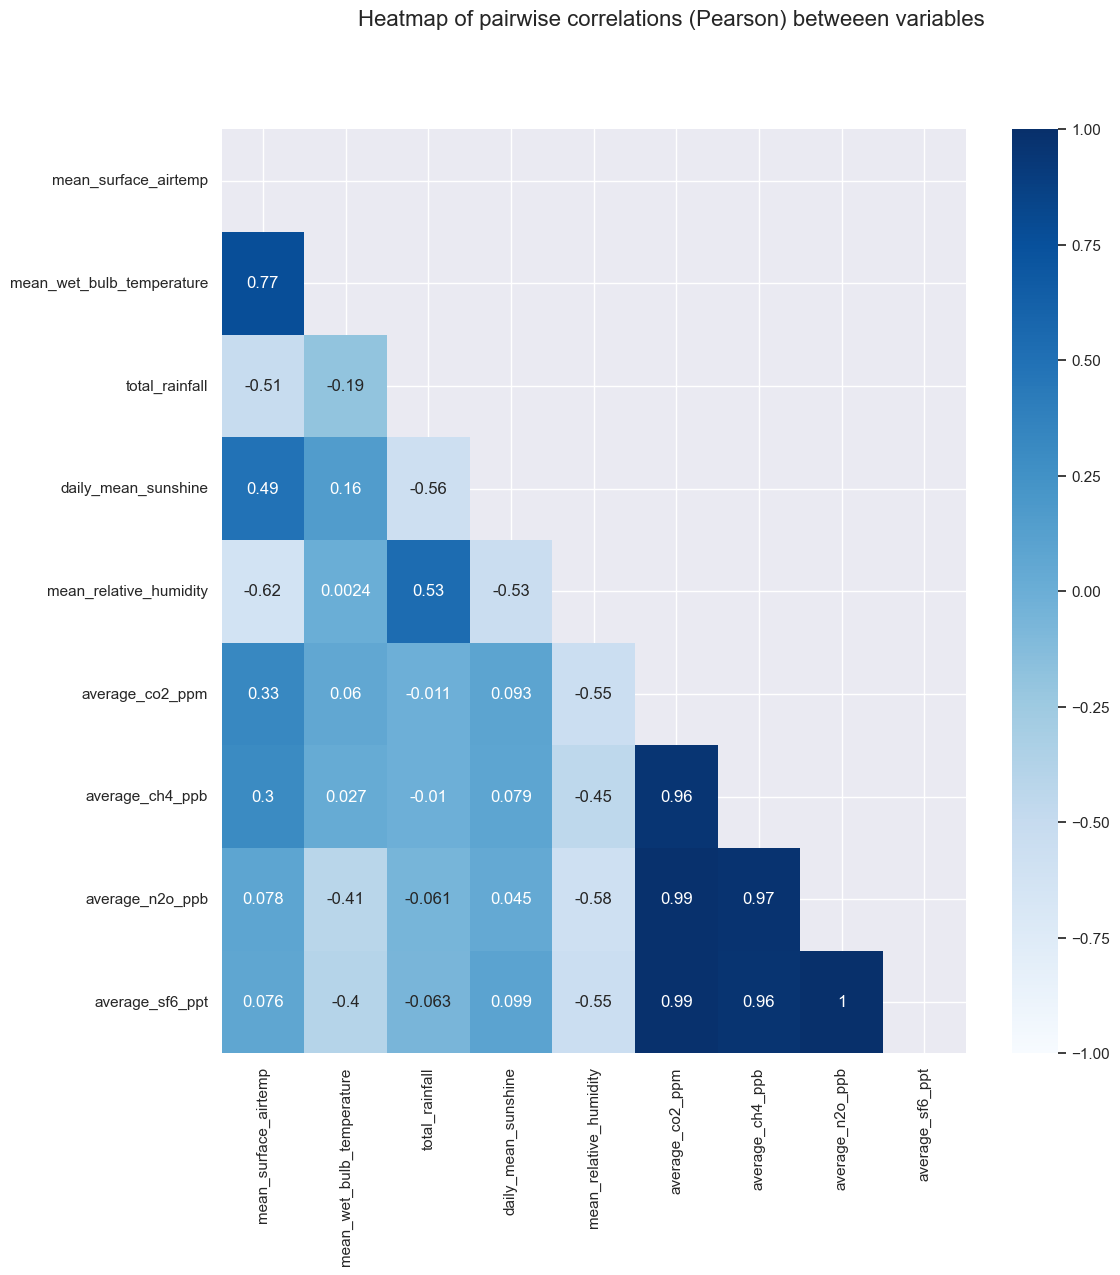

In [163]:
#Create a correlation heatmap as a triangle
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(final_df.corr(numeric_only=True)))
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap='Blues', vmin=-1, vmax=1, mask=mask)

plt.suptitle('Heatmap of pairwise correlations (Pearson) betweeen variables', fontsize=16);

#### Correlations

##### Correlations between WBT and other variables
1) 0.77 +ve correlation with mean_surface_airtemp (WBT goes up as MSA increases). Does this make sense? Yes, because WBT is function of MSA.
2) 0.41 -ve correlation with nitrous oxide (As nitrous oxide increases, WBT decreases). Why? Is there no explanation? Certainly not one I was able to discover on the internet. Perhaps this is where the advice of a SME would be most insightful.
3) 0.40 -ve correlation with sulfur hexafluoride (As sulfur hexafluoride increases, WBT decreases). Why? Same as for the point above.
4) 0.19 -ve correlation with total_rainfall (WBT goes down as rainfall increases). Why does WBT decrease with higher rainfall. My conjecture is related to the relationship between MSA and total_rainfall. When it rains, there is less direct sunshine, due to more cloud cover, which then decreases MSA, this in turn has the desired effect on WBT.
5) 0.16 +ve correlation with daily_mean_sunshine (WBT goes up as sunshine increases). This makes sense since sunshine affects MSA.
6) 0.0024 +ve correlation with mean_relative humidity (Almost no linear relationship between RH and WBT). Now, this I find rather strange, I have tested the change in WBT at a fixed temperature of 30°C, against RH in increments of 10% [from this website.](https://www.omnicalculator.com/physics/wet-bulb) The WBT increases by approximately 2°C for every 10% change in RH. My hypothesis is that, solving for the WBT at different values of RH takes into account the changes in RH due to other variables. Exogenously, a 10% change in RH will result in that approximately 2°C change in WBT, but in a climate system, that change in RH is accompanied by changes in many other variables that have an effect on the WBT, effectively 'washing out' any apparently relationship.


##### Correlations between MSA and other variables (excluding WBT)
1) 0.51 -ve correlation with total rainfall (MSA goes down as rainfall increases). I hypothesize that rain has an effect of lowering the MSA since there is more cloud cover and hence less direct sunshine.
2) 0.49 +ve correlation with sunshine (more sunshine, MSA goes up). As related to the point directly above, the air temperature would increase when there is more direct sunshine to heat up the air.
3) 0.62 -ve correlation with relative humidity (as MSA goes up, RH goes down). I hypothesize that the explanation is that warmer air can hold more moisture and this leads to a lower RH if absolute moisture content remains the same.
4) 0.33 +ve correlation with carbon dioxide (increase in this greenhouse gas increases MSA). The evidence of these correlations underpin the claim that climate change is anthropogenic (caused by humans).
5) 0.30 +ve correlation with methane (increase in this greenhouse gas increases MSA). Same as above.
6) 0.078 and 0.076 +ve correlation with nitrous oxide and sulfur hexafluoride. I don't expect all the greenhouse gases to have similar correlations with MSA.

##### Other interesting relationships
1) Sunshine has a 0.53 -ve correlation with RH (more sunshine, lower humidity). The reason could be what I have mentioned above. More sunshine increases the MSA, which increases the amount of moisture the air can hold, which in turn decreases the RH.
2) Rainfall 0.56 -ve correlation with sunshine (More rain, less sunshine). This should be quite self-explanatory. It does not seem likely for rain to occur in the lack of presence of clouds.
3) Rainfall 0.53 +ve correlation with RH (more rain, more humidity). I believe this should be quite self-explanatory. We would expect rain to increase the moisture content of the environment.
4) The greenhouse gases are highly +ve correlated amongst themselves. The reason would likely be that the increases are driven by human activities such as increased urbanisation and industrialisation.
5) RH -ve correlated with the greenhouse gases (-0.55, -0.45, -0.58, -0.55, respectively, in the order of carbon dioxide, methane, nitrous oxide and sulfur hexafluoride). [Increase in greenhouse gas concentrations actually give rise to a 'humidity paradox',](https://www.carbonbrief.org/guest-post-investigating-climate-changes-humidity-paradox/) where absolute moisture content as measured by the specific humidity is increasing, but because warmer air can hold more moisture, the relative humidity actually decreases. As stated in the article, this paradox has been observed over many regions of the planet. In fact this paradox may actually resolve the puzzling lack of correlation between RH with WBT. Unfortunately there is no available data for the specific humidity as measured by the Changi climate station, but I would certainly like to be able to chart the relationship between specific humidity and the WBT.

#### Pairplot

<Figure size 1200x1200 with 0 Axes>

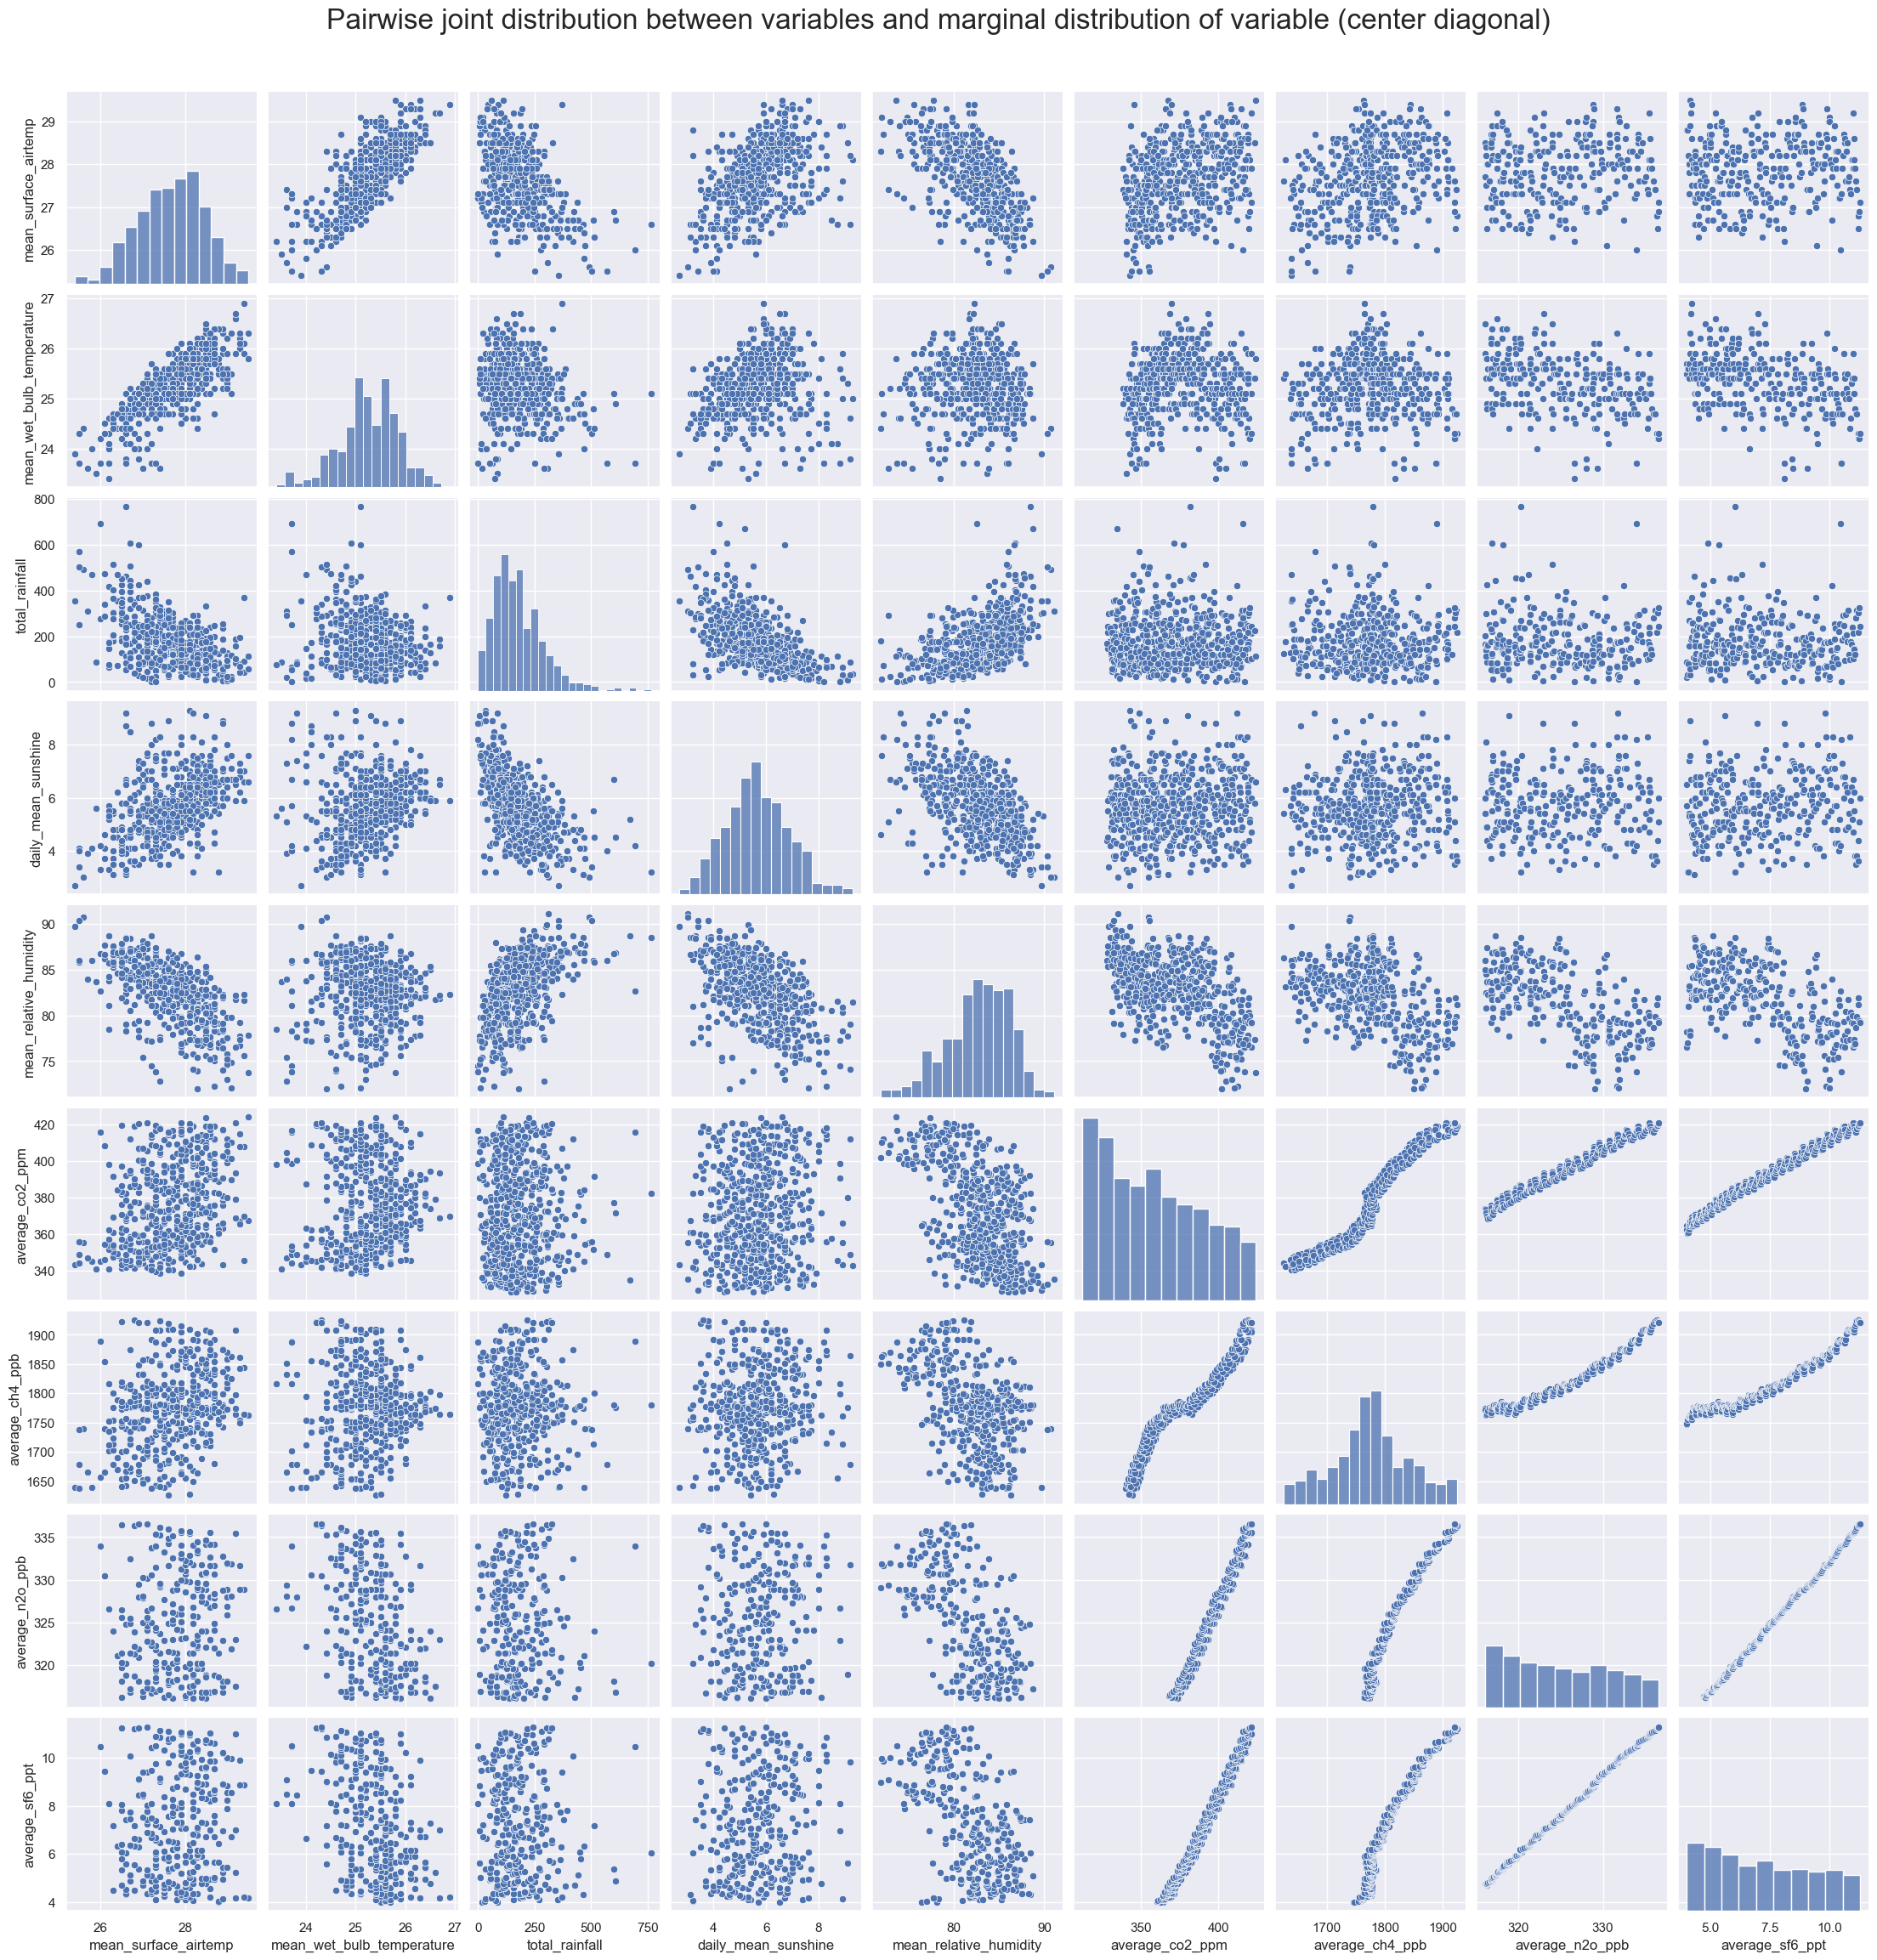

In [164]:
# Plotting pairplot to quickly visualise relationships among all pairs of variables
plt.figure(figsize=(12,12))
sns.pairplot(data=final_df)

plt.suptitle('Pairwise joint distribution between variables and marginal distribution of variable (center diagonal)', fontsize=24, y=1.03);

### Lineplots

The below code cell will output lineplots of time against my features (variables). I have not adjusted the x-limits to allow for the values to be interpreted over the same date range. This are my interpretations.

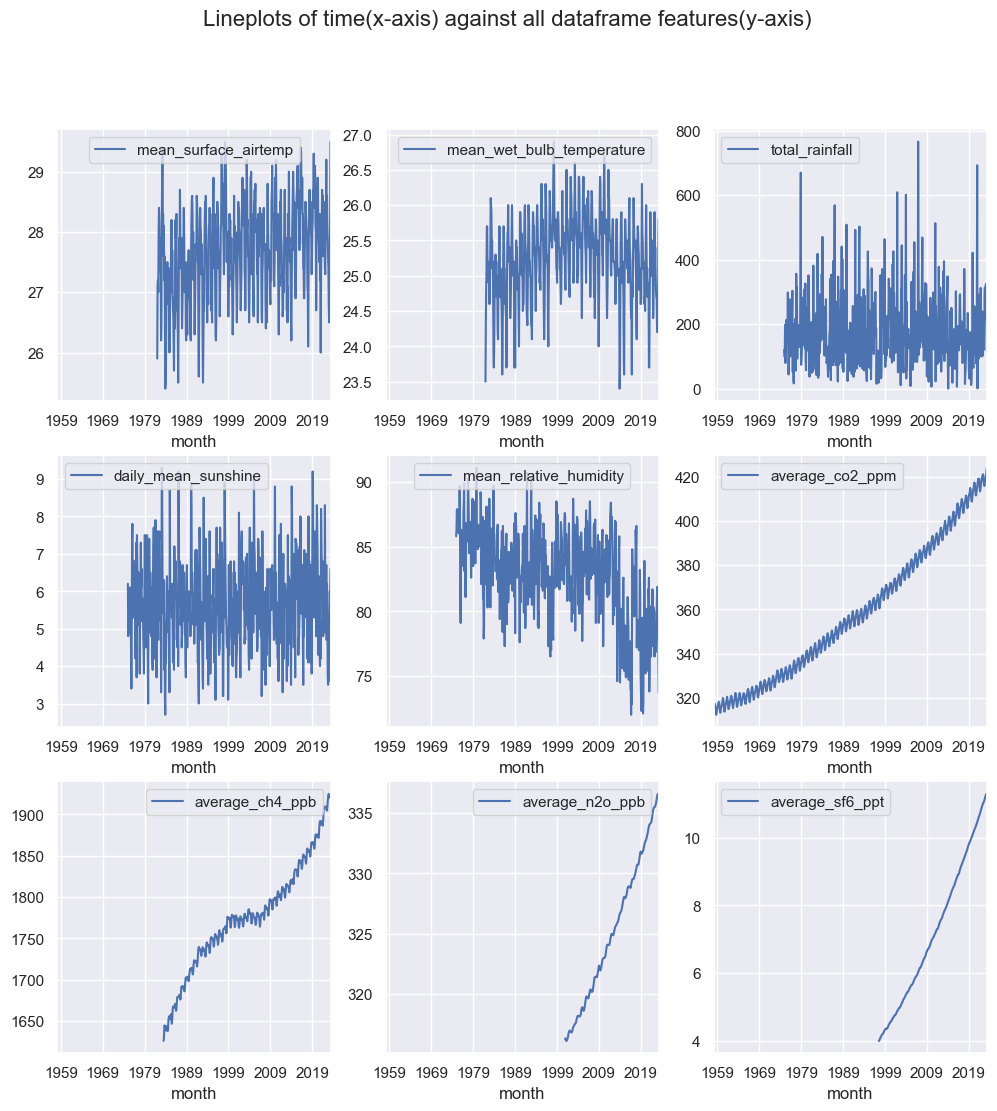

In [165]:
#Plotting lineplots of columns(features) against time using a 3x3 subplot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

final_df.plot(x='month',y='mean_surface_airtemp', ax=axes[0,0]).legend(loc='upper center')
final_df.plot(x='month',y='mean_wet_bulb_temperature', ax=axes[0,1])
final_df.plot(x='month',y='total_rainfall', ax=axes[0,2])
final_df.plot(x='month',y='daily_mean_sunshine', ax=axes[1,0])
final_df.plot(x='month',y='mean_relative_humidity', ax=axes[1,1]).legend(loc='upper center')
final_df.plot(x='month',y='average_co2_ppm', ax=axes[1,2])
final_df.plot(x='month',y='average_ch4_ppb', ax=axes[2,0])
final_df.plot(x='month',y='average_n2o_ppb', ax=axes[2,1])
final_df.plot(x='month',y='average_sf6_ppt', ax=axes[2,2])

fig.suptitle('Lineplots of time(x-axis) against all dataframe features(y-axis)', fontsize=16);

#### For the weather variables, a limitation is that there is no best-fit line to indicate some sort of trendline. Alternatively, I would like to plot some sort of moving average to determine how the average(mean) is trending over time.
1) MSA appears to be increasing over time. [The literature indicates an increase of about 0.25°C per decade](https://www.researchgate.net/publication/339398733_Singapore%27s_Second_National_Climate_Change_Study_Climate_Projections_to_2100_-_Report_for_Stakeholders)
2) RH appears to be decreasing over time. An explanation about this 'humidity paradox' has been posited in the markdown cell above.
3) On visual inspection, it is quite hard to determine if there is no trend observed for both total rainfall and sunshine.
4) For the WBT, it does seem peculiar that the values for WBT look like quadratic function. The WBT values do not seem to be increasing over time and does seem to suggest that the narrative on ever increasing WBT temperatures may not be true, at least for Singapore. It may be possible that there are more extreme values, which would still pose a problem to human biology. The difficulty in ascertaining that, is that to do monthwise comparisons on mean values, I have applied the appropriate logic to extract out the mean values for month. Therefore it is possible that there are more minutes in a day, today compared to 20 years ago, where the WBT has exceeded some threshold value, but when averaged out, still produces a mean value that has not increased over time. 


#### For the greenhouse gases, the trend is an increase over time, due to human intervention, over the date range for which data was collected. I do feel it is necessary to restate why the emissions are increasing as that is the basis upon which climate modeling for the future are made on. I have instead made reference to my summary statistics for the dataframe.
1) Concentrations of carbon dioxide have increased from about 312ppm to 424ppm over the time period 03/1958 to 06/2023
2) Concentrations of methane have increased from about 1626ppm to 1924ppb over the time period 07/1983 to 03/2023
3) Concentrations of nitrous oxide have increased from about 316ppb to 336ppb over the time period 01/2001 to 03/2023
4) Concentrations of sulfur hexafluoride have increased from about 4ppt to 11ppt over the time period 07/1997 to 03/2023

### Histograms

I have decided not to plot the histograms for the greenhouse gas emissions since it makes more sense to plot them against time as their relationship with time is a linear positive one.

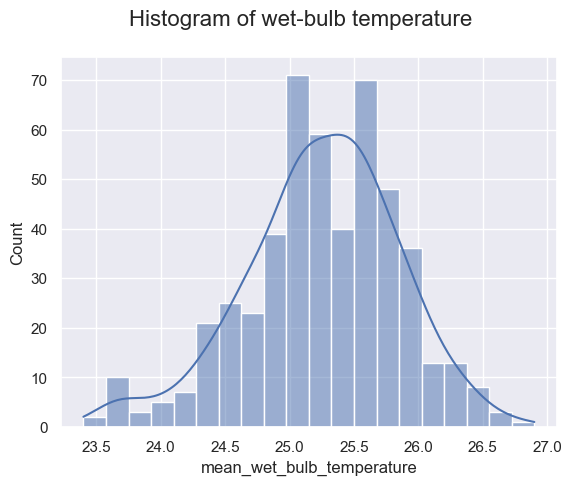

In [166]:
#Plotting histogram for wet-bulb temperature

sns.histplot(data=final_df, x='mean_wet_bulb_temperature', kde=True)
plt.suptitle('Histogram of wet-bulb temperature', fontsize=16);

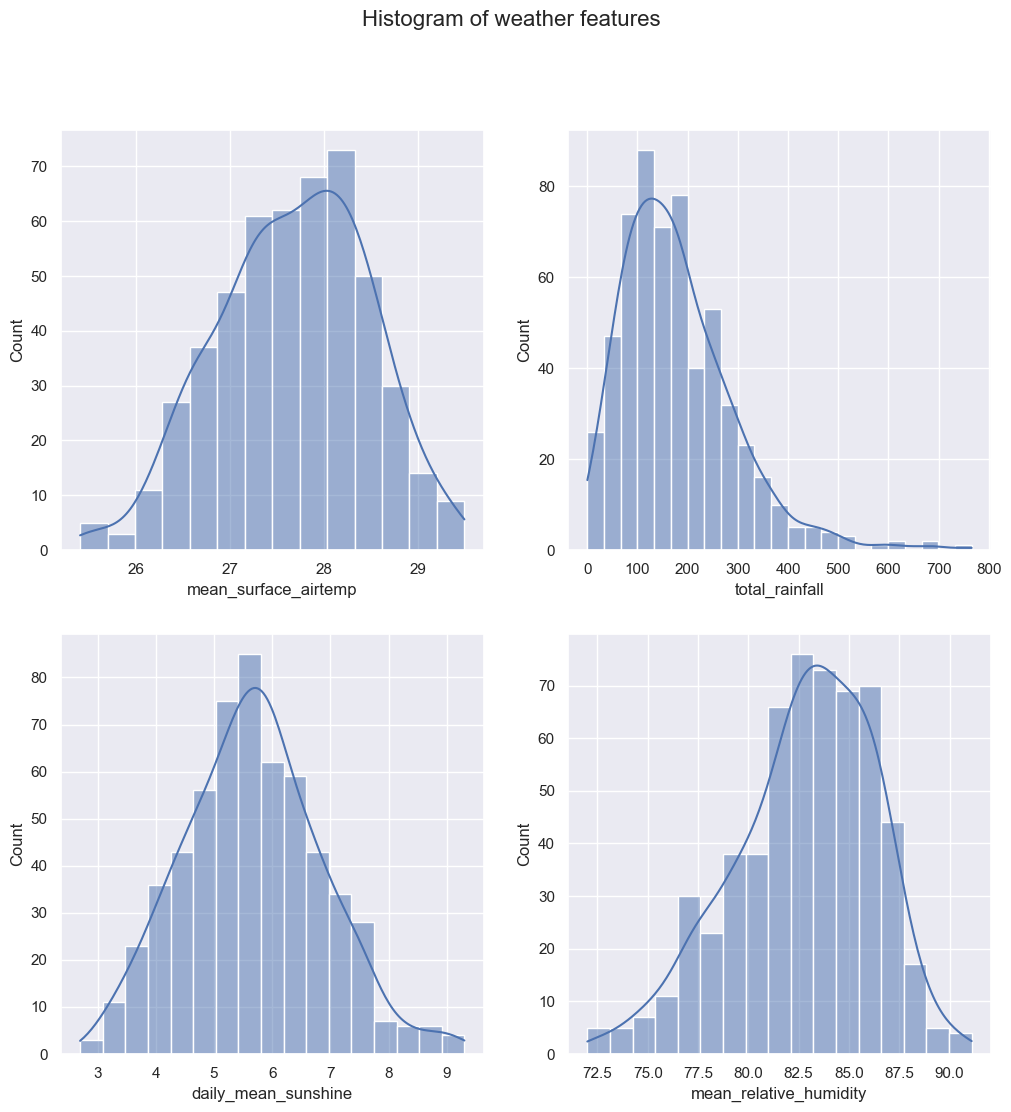

In [167]:
#Plotting histograms of columns(features) using a 2x2 subplot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.histplot(data=final_df, x='mean_surface_airtemp', kde=True, ax=axes[0,0])
sns.histplot(data=final_df, x='total_rainfall', kde=True, ax=axes[0,1])
sns.histplot(data=final_df, x='daily_mean_sunshine', kde=True, ax=axes[1,0])
sns.histplot(data=final_df, x='mean_relative_humidity', kde=True, ax=axes[1,1])

fig.suptitle('Histogram of weather features', fontsize=16);

In [168]:
#returns the value of skew for numeric columns
final_df.skew(numeric_only=True)

mean_surface_airtemp        -0.211333
mean_wet_bulb_temperature   -0.386787
total_rainfall               1.320983
daily_mean_sunshine          0.240633
mean_relative_humidity      -0.506095
average_co2_ppm              0.364346
average_ch4_ppb              0.010209
average_n2o_ppb              0.201855
average_sf6_ppt              0.250385
dtype: float64

In [169]:
#returns the value of kurtosis for numeric columns
final_df.kurtosis(numeric_only=True)

mean_surface_airtemp        -0.374894
mean_wet_bulb_temperature    0.315181
total_rainfall               3.024767
daily_mean_sunshine          0.031724
mean_relative_humidity      -0.032301
average_co2_ppm             -1.046411
average_ch4_ppb             -0.267663
average_n2o_ppb             -1.159610
average_sf6_ppt             -1.170162
dtype: float64

#### Skew

There appears to be some skew in the below histograms of our features. As such I have opted to use the skew method in pandas and to summarise the results here:
1) mean_surface_airtemp, -0.211333 (left-skewed)
2) mean_wet_bulb_temperature, -0.386787 (left-skewed)
3) total_rainfall, 1.320983 (right-skewed)
4) daily_mean_sunshine, 0.240633 (right skewed)
5) mean_relative_humidity, -0.506095 (left-skewed)

#### Kurtosis

These are the kurtosis values for the same columns as above:
1) mean_surface_airtemp, -0.374894
2) mean_wet_bulb_temperature, 0.315181
3) total_rainfall, 3.024767 (as this value is more than 3, than the tails are heavier than the normal distribution)
4) daily_mean_sunshine, 0.031724
5) mean_relative_humidity, -0.032301

We can use this values of kurtosis and skew to infer how normally distributed are data is.

### Scatterplots

I have outlined possible explanations for the relationships between variables at the start of the visualisation section under the overview section

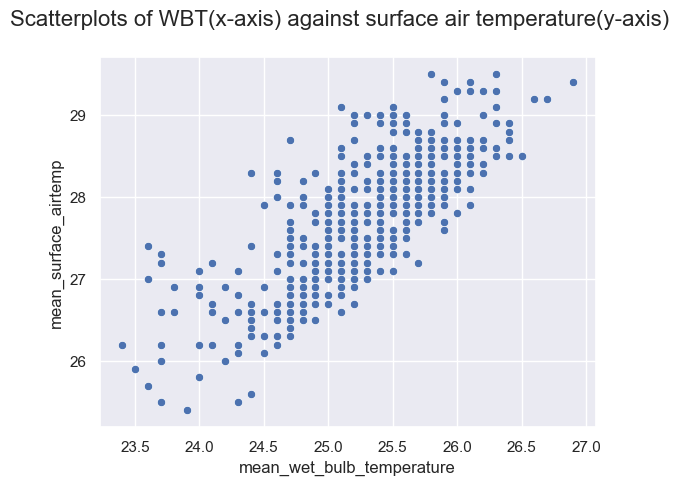

In [170]:
#Plotting scatterplot of WBT against MSA
sns.scatterplot(data=final_df, x='mean_wet_bulb_temperature', y='mean_surface_airtemp')
plt.suptitle('Scatterplots of WBT(x-axis) against surface air temperature(y-axis)', fontsize=16);

#### Scatterplot of WBT against surface air temperature
We can see quite a strong +ve linear correlation with mean_surface_airtemp. This is evident from the correlation of +0.77. This feature is the one that is most highly correlated with WBT.

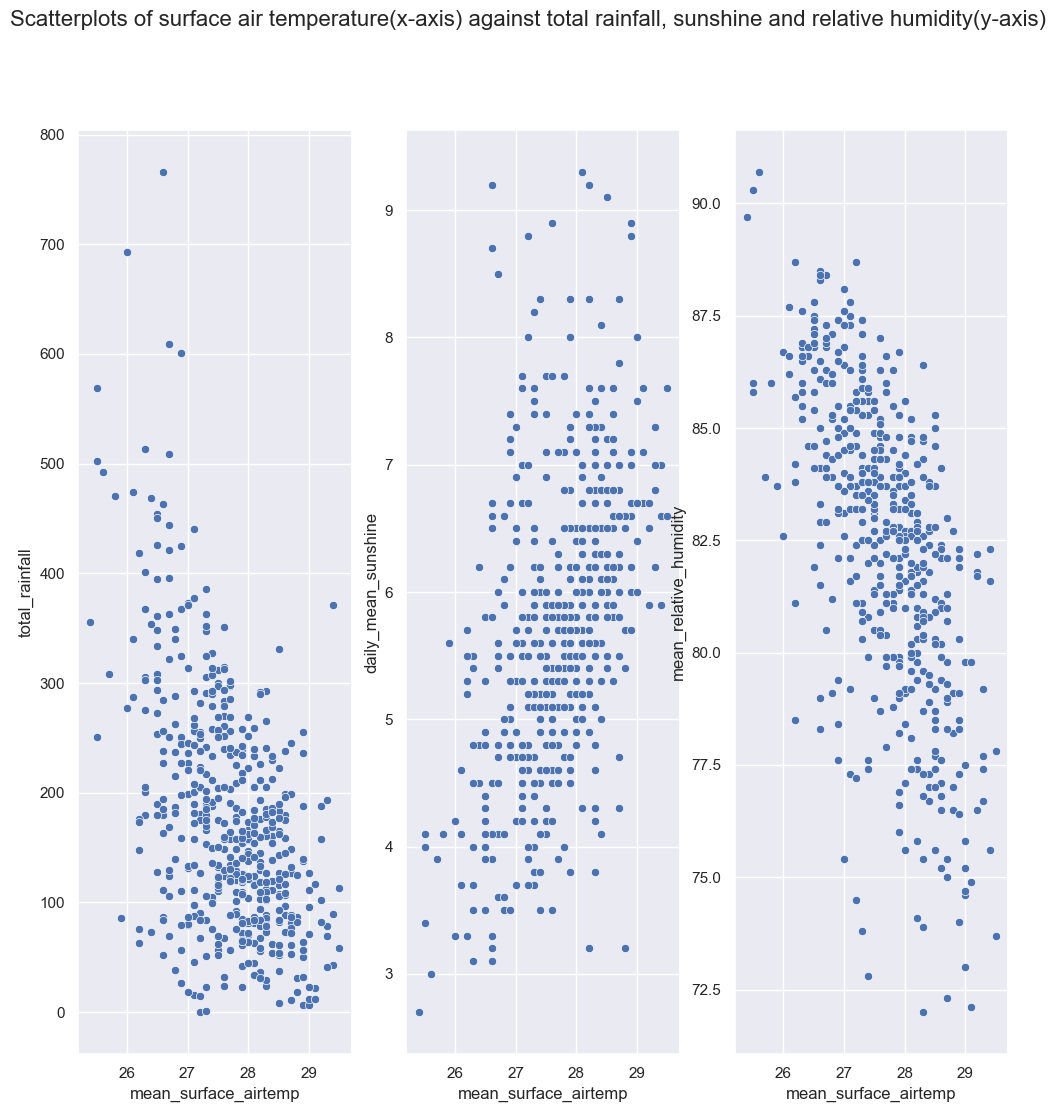

In [171]:
#Plotting scatterplots of surface_air_temp against rainfall, sunshine and relative humidity using a 1x3 subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

sns.scatterplot(data=final_df, x='mean_surface_airtemp', y='total_rainfall', ax=axes[0])
sns.scatterplot(data=final_df, x='mean_surface_airtemp', y='daily_mean_sunshine', ax=axes[1])
sns.scatterplot(data=final_df, x='mean_surface_airtemp', y='mean_relative_humidity', ax=axes[2])

fig.suptitle('Scatterplots of surface air temperature(x-axis) against total rainfall, sunshine and relative humidity(y-axis)', fontsize=16);

#### Scatterplots of MSA against rainfall, sunshine and relative humidity.

1) There is an observable -ve correlation with total rainfall. The value of the correlation is -0.51.
2) There is an observable +ve correlation with sunshine. The value of the correlation is 0.49.
3) There is an observable -ve correlation with relative humidity The value of the correlation is -0.62.


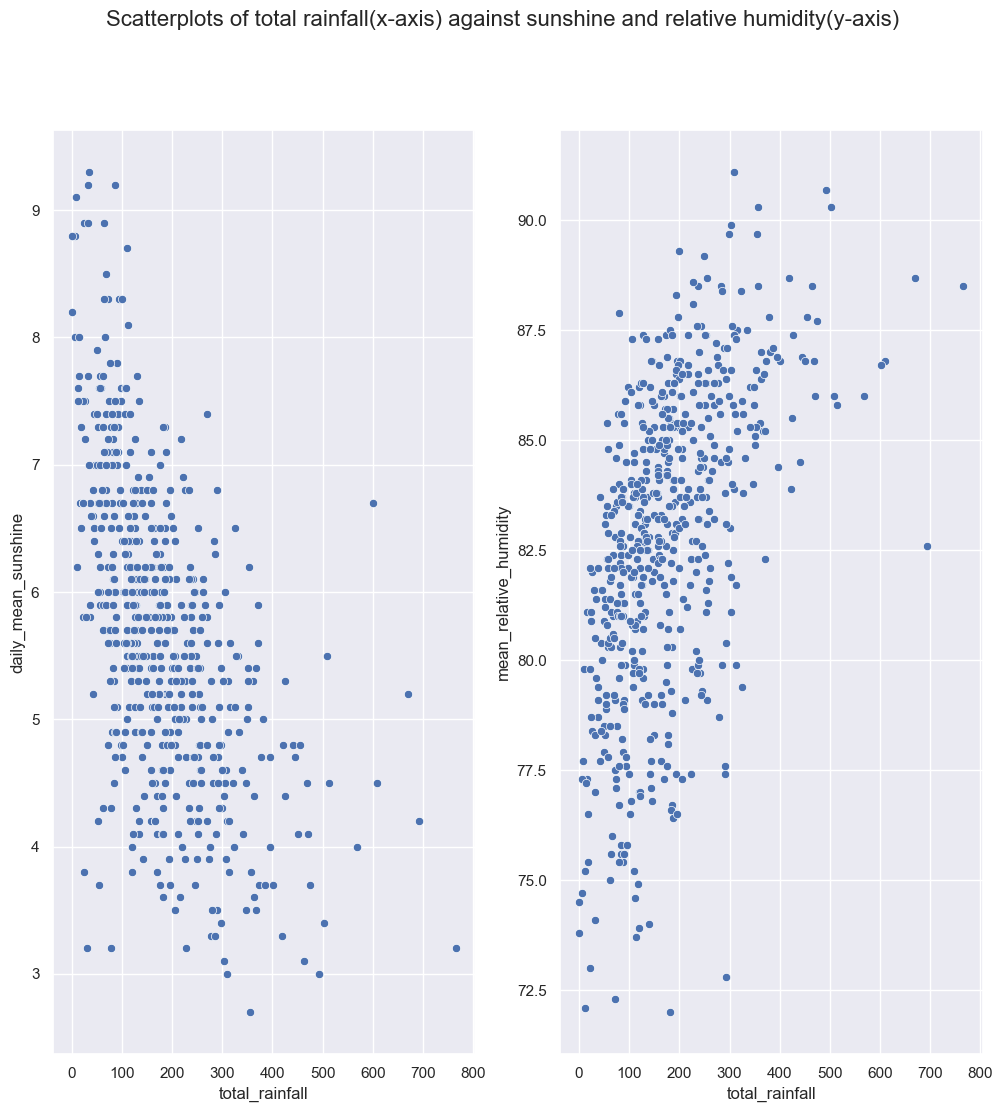

In [172]:
#Plotting scatterplots of total_rainfall against sunshine and relative humidity using a 1x2 subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

sns.scatterplot(data=final_df, x='total_rainfall', y='daily_mean_sunshine', ax=axes[0])
sns.scatterplot(data=final_df, x='total_rainfall', y='mean_relative_humidity', ax=axes[1])

fig.suptitle('Scatterplots of total rainfall(x-axis) against sunshine and relative humidity(y-axis)', fontsize=16);

#### Scatterplots of rainfall against sunshine and relative humidity
1) There is an observable -ve correlation with sunshine. The value of the correlation is -0.56.
2) There is an observable +ve correlation with relative humidity. The value of the correlation is +0.53.

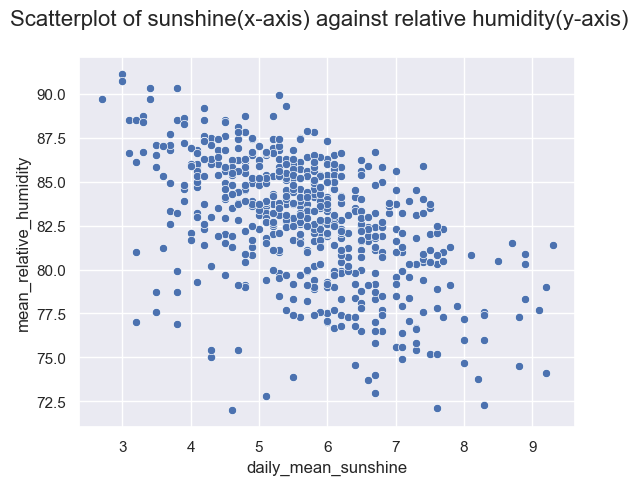

In [173]:
#Plotting scatterplot of daily_mean_sunshine against mean_relative_humidity 
sns.scatterplot(data=final_df, x='daily_mean_sunshine', y='mean_relative_humidity')
plt.suptitle('Scatterplot of sunshine(x-axis) against relative humidity(y-axis)', fontsize=16);

#### Scatterplot of sunshine against relative humidity
There is an observable -ve correlation with relative humidity. The value of the correlation is -0.53.

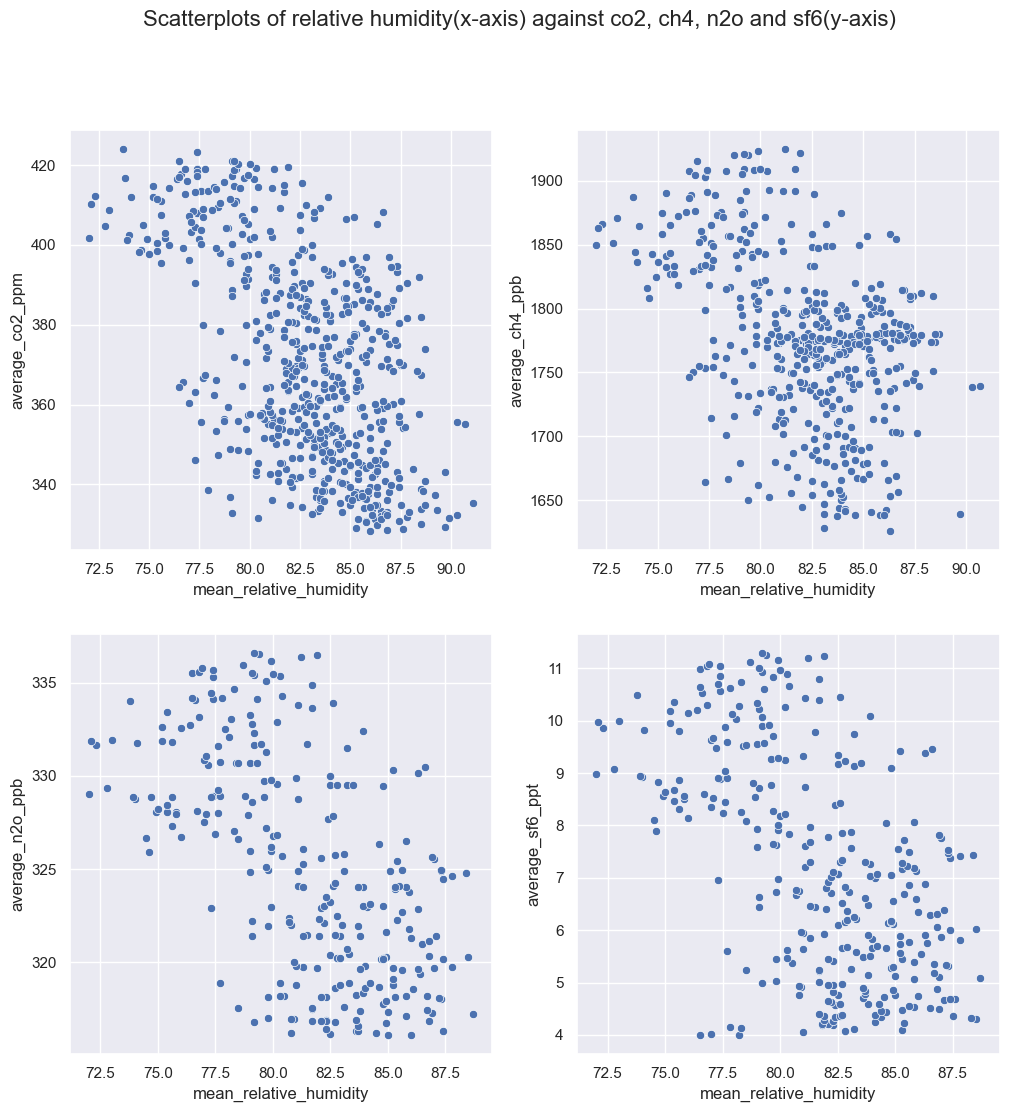

In [174]:
#Plotting scatterplot of relative humidity against co2, ch4, n2o and sf6
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.scatterplot(data=final_df, x='mean_relative_humidity', y='average_co2_ppm', ax=axes[0,0])
sns.scatterplot(data=final_df, x='mean_relative_humidity', y='average_ch4_ppb', ax=axes[0,1])
sns.scatterplot(data=final_df, x='mean_relative_humidity', y='average_n2o_ppb', ax=axes[1,0])
sns.scatterplot(data=final_df, x='mean_relative_humidity', y='average_sf6_ppt', ax=axes[1,1])

fig.suptitle('Scatterplots of relative humidity(x-axis) against co2, ch4, n2o and sf6(y-axis)', fontsize=16);

#### Scatterplots of relative humidity against the greenhouse gas emissions
There are observable -ve correlations with carbon dioxide, methane, nitrous oxide and sulfur hexafluoride. The correlation values are -0.55, -0.45, -0.58, -0.55 respectively.

### Boxplots

Boxplots allow us to visually inspect numeric features for outliers.

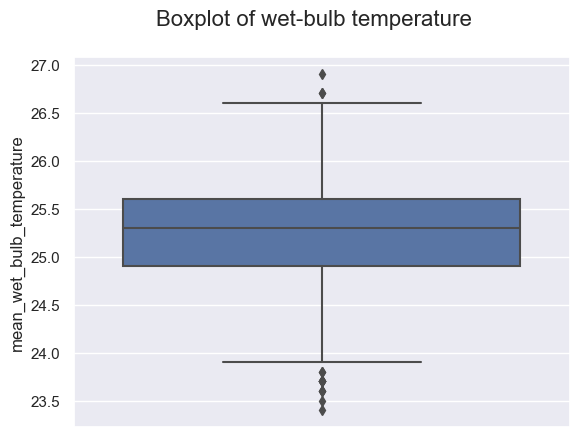

In [175]:
# Plotting boxplot of WBT
sns.boxplot(data=final_df, y='mean_wet_bulb_temperature')
plt.suptitle('Boxplot of wet-bulb temperature', fontsize=16);

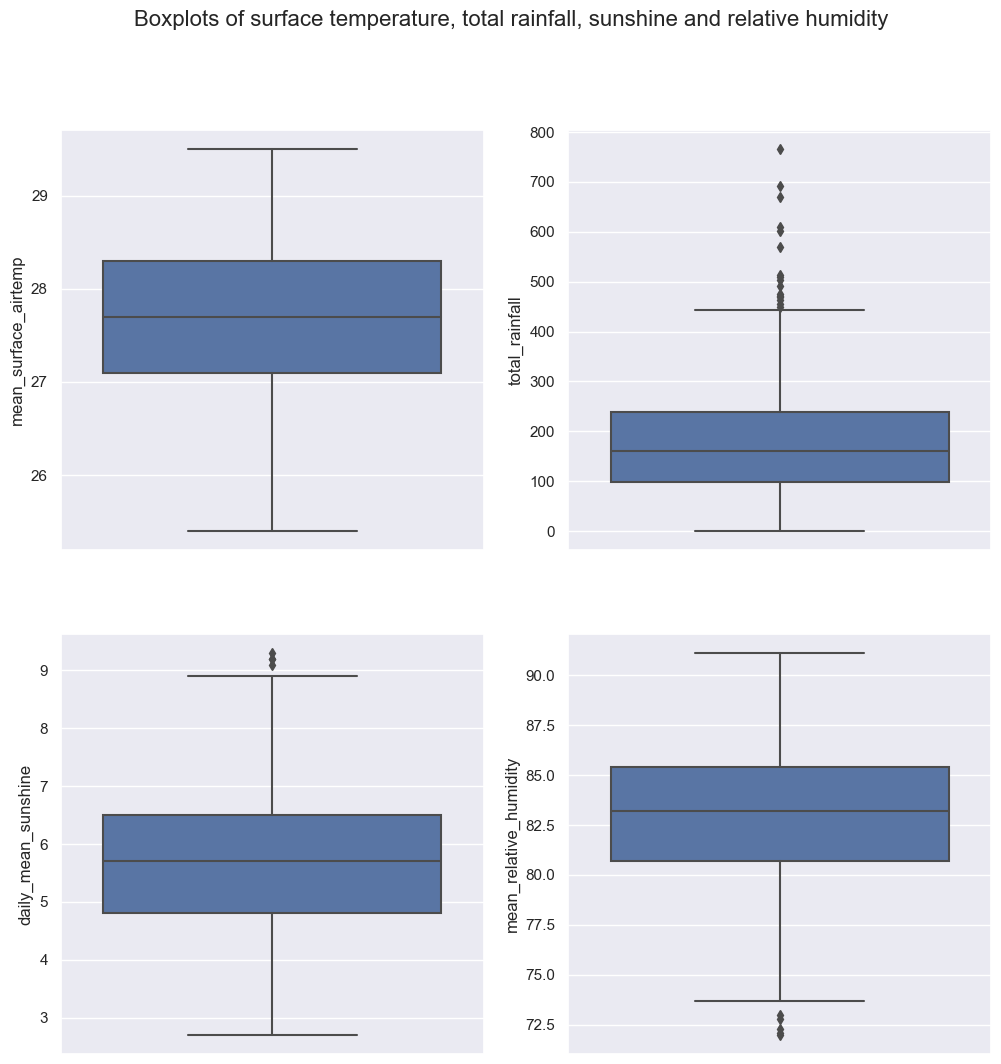

In [176]:
# Plotting boxplot of various features in a 2x2 subplot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.boxplot(data=final_df, y='mean_surface_airtemp', ax=axes[0,0])
sns.boxplot(data=final_df, y='total_rainfall', ax=axes[0,1])
sns.boxplot(data=final_df, y='daily_mean_sunshine', ax=axes[1,0])
sns.boxplot(data=final_df, y='mean_relative_humidity', ax=axes[1,1])

fig.suptitle('Boxplots of surface temperature, total rainfall, sunshine and relative humidity', fontsize=16);

#### Outliers
1) mean_wet_bulb_temperature has more outliers at the lower end than the upper end of the boxplot, and has the 2nd most number of outliers
2) mean_surface_airtemp has no outliers
3) total_rainfall only has outliers at the upper end of the boxplot and has the most outliers of these numeric features 
4) daily_mean_sunshine only has outliers at the upper end of the boxplot and has the 4th most number of outliers
5) mean_relative_humidity only has outliers at the bottom end of the boxplot and has the 3rd most number of outliers

Note that outliers at the upper end are greater than the (75th quartile + 1.5 * IQR) and outliers at the lower end are lesser than the (25th quartile - 1.5 * IQR)

I speculate that possible questions could be, are there environmental variables measured in other parts of the world that we do not measure that show correlation with the WBT? Can we improve our monitoring of environmental variables that show a relationship with WBT? Can we make a prediction using AI as to when the WBT will rise above a certain value? These questions are beyond the scope of this data analysis but highlight the possibility for further research.

## Conclusions and Recommendations

### Conclusion
The government of Singapore is concerned about the effects of climate change on the country's climate. In particular, they are interested in understanding how the wet-bulb temperature (WBT) is affected by climate change.

The WBT is a measure of how hot and humid it is outside, and it is important because it can be deadly if it gets too high. Climate change is causing the WBT to rise, and this is a major concern for Singapore because it is a tropical country with high humidity.

This study investigates the relationship between the WBT and climate change. The study found that there is a positive correlation between the WBT and the following variables:

    Mean surface air temperature (MSA)
    Nitrous oxide
    Sulfur hexafluoride
    Total rainfall
    Daily mean sunshine

There is a negative correlation between the WBT and the following variables:

    Relative humidity

The study also found that there are some interesting relationships between the other variables. For example, sunshine has a negative correlation with relative humidity, while rainfall has a positive correlation with both sunshine and relative humidity.

The study's findings suggest that climate change is having a significant impact on the WBT in Singapore. The increase in greenhouse gases is causing the air to warm up, which in turn is decreasing the relative humidity. This combination of factors is leading to an increase in the WBT, which could have serious consequences for human health and safety.

Overall, the study's findings suggest that climate change is having a significant impact on the WBT in Singapore. The government should continue to monitor the WBT and other climate-related variables, and develop policies to mitigate the effects of climate change on the country's climate.


### Recommendations

### 1. Continue to monitor the WBT and other climate-related variables, but increase the number of variables monitored
Given the possibility that the WBT will eventually exceed 35°C in the future, it is imperative that we continue to monitor the variables in this study. One weakness of this study is that climate is influenced by many factors. Factors that were not taken into account due to lack of monitoring. Therefore, we would like to include at least:
1. Wind speed
2. Temperature of the waters directly adjacent to Singapore, such as the Straits of Malacca and the Straits of Johor.
3. Specific humidity
4. Other greenhouse gases such as hydrochlorofluorocarbons (HCFCs), hydrofluorocarbons (HFCs) and ozone

If these data is not currently available, then these values should start being logged. The lack of past availability of these variables can be partially addressed by using data from nearby weather stations and using them as a proxy for Singapore. These nearby weather stations would be from our neighbours.

By measuring these other variables and the effect on the WBT, we would have more input that could potentially affect a model designed to predict the WBT. As the goal is to predict as accurately as possible the WBT for given levels of these variables, we would like a predictive model that has value.

### 2. Develop policies to mitigate the effects of climate change on the country's climate.
Postulating that the WBT will continue to climb, policy planners should continue to further implement policy that can mitigate anthropogenic climate change. Of course, this is based on the assumption that climate change is not driven by natural causes.

Although the time series of WBT does not show an increase over the years, there exists the possibility of more extreme values, which would still pose a danger to human physiology. Furthermore, there could have been other issues that do not violate the assumption that the WBT has been climbing. There will always be the possibilty that the WBT will eventually stabilize at a value that would not endanger Singapore, and if this does not happen, then the model of the future was wrong and there was actually nothing to be alarmed about. Constrast that with the possibility that the WBT will continue to climb, and this is the gist of my problem statement. Comparing the two scenarios, in the former case, we are wrong, but the cost of being wrong is low, we would have tried to address a issue with the climate based on trends that did not materialise. In the latter case, the value of acting is high, we were prepared for a consistently higher WBT and we took steps to account for that.

This reasoning is based on sound reasoning established by the United Nations Framework Convention on Climate Change (UNFCCC). The UNFCCC states that ['a lack of full scientific certainty shall not be used as a reason for postponing cost-effective measures to prevent environmental degradation'.](https://www.iisd.org/articles/deep-dive/precautionary-principle) This is also known as the precautionary principle.

I would also like to address an issue known as the ['tragedy of the commons'.](https://online.hbs.edu/blog/post/tragedy-of-the-commons-impact-on-sustainability-issues) In this case, the public good is the environment of the earth and that the earth's climate is suitable for human habitation. Other actors would despoil the earth and not make effects to address climate change since there are costs in doing so. The collective actions of everyone acting on their own interest would eventually destroy the climate of the earth. Singapore could cite this as a reason not to develop and implement policies, since we are a relatively small nation with a small population relative to the rest of the other countries.

This is a very dangerous fallacy and this is where Singapore must use it's influence on the world stage to convince bigger nation states that not only is Singapore on-board with efforts to mitigate climate change, Singapore does so as a 'first-mover', instead of waiting for other's to act first.

I would like to iterate that these policies must be not be in a bubble and has to coupled with the predictions from the monitoring as mentioned in my first point. For example, if WBT climbs faster than predicted, then policy measures have to be stepped up as appropriate.

